In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhargavedupuganti","key":"44f6ffb8f81210f5b1745272337d1fd6"}'}

In [2]:
!mkdir ~/.kaggle/

In [3]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Download the dataset from kaggle

In [4]:
#Download the dataset from kaggle
!kaggle competitions download -c dogs-vs-cats

 99% 803M/812M [00:06<00:00, 184MB/s]
100% 812M/812M [00:06<00:00, 132MB/s]


In [7]:
#unzip the downloaded dataset
!unzip -qq dogs-vs-cats.zip

In [9]:
#unzip the training dataset
!unzip -qq train.zip

1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

In [ ]:
Copying images to training, validation, and test directories

In [10]:
#import the required libraries
import os, shutil, pathlib

#assign the data to directories
original_directory = pathlib.Path("train")
new_base_directory = pathlib.Path("cats_vs_dogs_small_1")


def subset_main(subset_1, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_directory / subset_1 / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_directory / fname, dst=dir / fname)

#split the data to training, validation abd test datasets
subset_main("train", start_index=158, end_index=1158)
subset_main("validation", start_index=1159, end_index=1659)
subset_main("test", start_index=1660, end_index=2160)

 Using image_dataset_from_directory to read images

In [11]:
from tensorflow.keras.utils import image_dataset_from_directory
#assign the data to datasets
train_data = image_dataset_from_directory(new_base_directory / "train", image_size=(180, 180),batch_size=32)
validation_data = image_dataset_from_directory(new_base_directory / "validation", image_size=(180, 180), batch_size=32)
test_data = image_dataset_from_directory(new_base_directory / "test", image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Instantiating a small convnet for dogs vs. cats classification with dropout

In [12]:
# import the keras network library
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Dropout, Rescaling, MaxPool2D

model1 = Sequential()

# Add a rescaling layer to scale input values to [0, 1]
model1.add(Rescaling(scale=1./255, input_shape=(180, 180, 3)))

# Add a convolutional layer (32 units)
model1.add(Conv2D(32,kernel_size=3,activation='relu'))
# maxpooling
model1.add(MaxPool2D(2))

# Add another convolutional layer (64 units)
model1.add(Conv2D(64,kernel_size=3,activation='relu'))
# maxpooling
model1.add(MaxPool2D(2))

# Add another convolutional layer (128 units)
model1.add(Conv2D(128,kernel_size=3,activation='relu'))
# maxpooling
model1.add(MaxPool2D(2))

# Add another convolutional layer (256 units)
model1.add(Conv2D(256,kernel_size=3,activation='relu'))
# maxpooling
model1.add(MaxPool2D(2))

# Add another convolutional layer (256 units)
model1.add(Conv2D(256,kernel_size=3,activation='relu'))

# Flatten and feed to output layer
model1.add(Flatten())
# adding the dropout layer to reduce overfitting
model1.add(Dropout(0.25))
# adding the output layer
model1.add(Dense(1, activation='sigmoid'))

Compiling the model

In [13]:
model1.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

Understanding TensorFlow Dataset objects

In [15]:
import numpy as np
import tensorflow as tf
random_number = np.random.normal(size=(1000, 16))
data = tf.data.Dataset.from_tensor_slices(random_number)

In [16]:
for i, element in enumerate(data):
    print(element.shape)
    if i >= 1:
        break

(16,)
(16,)


In [17]:
batch_data = data.batch(32)
for i, element in enumerate(batch_data):
    print(element.shape)
    if i >= 1:
        break

(32, 16)
(32, 16)


In [18]:
reshape_data = data.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshape_data):
    print(element.shape)
    if i >= 1:
        break

(4, 4)
(4, 4)


Displaying the shapes of the data and labels yielded by the Dataset

In [19]:
for data_batch, labels_batch in train_data:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Fitting the model using a Dataset

In [20]:
# import the keras network library
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping

callback1 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
#fit the model
history1 = model1.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callback1)

Epoch 1/20
63/63 [==============================] - 15s 91ms/step - loss: 0.7019 - accuracy: 0.5090 - val_loss: 0.6900 - val_accuracy: 0.4980
Epoch 2/20
63/63 [==============================] - 5s 69ms/step - loss: 0.7039 - accuracy: 0.5295 - val_loss: 0.7107 - val_accuracy: 0.5000
Epoch 3/20
63/63 [==============================] - 6s 99ms/step - loss: 0.6866 - accuracy: 0.5545 - val_loss: 0.6612 - val_accuracy: 0.6270
Epoch 4/20
63/63 [==============================] - 4s 57ms/step - loss: 0.6631 - accuracy: 0.6145 - val_loss: 0.7515 - val_accuracy: 0.5510
Epoch 5/20
63/63 [==============================] - 4s 61ms/step - loss: 0.6316 - accuracy: 0.6435 - val_loss: 0.6142 - val_accuracy: 0.6710
Epoch 6/20
63/63 [==============================] - 7s 98ms/step - loss: 0.6050 - accuracy: 0.6780 - val_loss: 0.6567 - val_accuracy: 0.5820
Epoch 7/20
63/63 [==============================] - 4s 59ms/step - loss: 0.5783 - accuracy: 0.6865 - val_loss: 0.5498 - val_accuracy: 0.7220
Epoch 8/20
6

Displaying curves of loss and accuracy during trainin

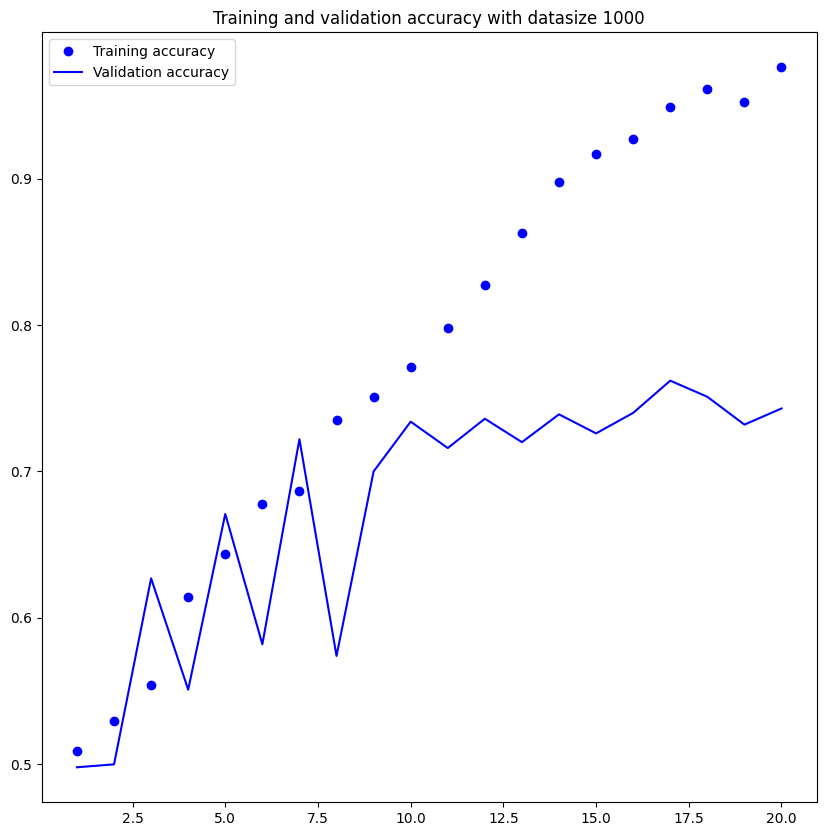

<Figure size 640x480 with 0 Axes>

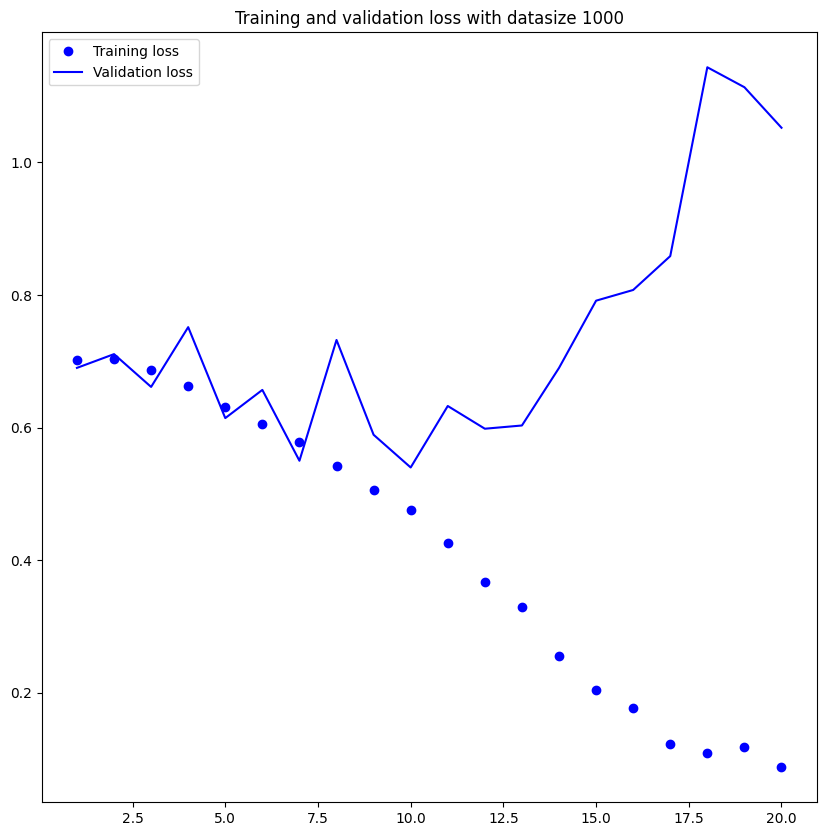

In [21]:
#import pyplot library
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
accuracy1 = history1.history["accuracy"]
val_accuracy1 = history1.history["val_accuracy"]
loss1 = history1.history["loss"]
val_loss1 = history1.history["val_loss"]
epochs = range(1, len(accuracy1) + 1)

#plot the traing and vlidation accuracies
plt.plot(epochs, accuracy1, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy1, "b", label="Validation accuracy")
plt.title("Training and validation accuracy with datasize 1000")
plt.legend()
plt.figure()

#plot the traing and vlidation losses
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss1, "bo", label="Training loss")
plt.plot(epochs, val_loss1, "b", label="Validation loss")
plt.title("Training and validation loss with datasize 1000")
plt.legend()
plt.show()

Evaluating the model on the test set with datasize=1000

In [22]:
#Evaluate the model
test_model1 = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_accuracy1 = test_model1.evaluate(test_data)
print(f"Test accuracy1: {test_accuracy1:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.5505 - accuracy: 0.7390
Test accuracy1: 0.739


Define a data augmentation stage to add to an image model

In [23]:
# dataaugmentation layers
data_augmentation1 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Displaying some randomly augmented training image

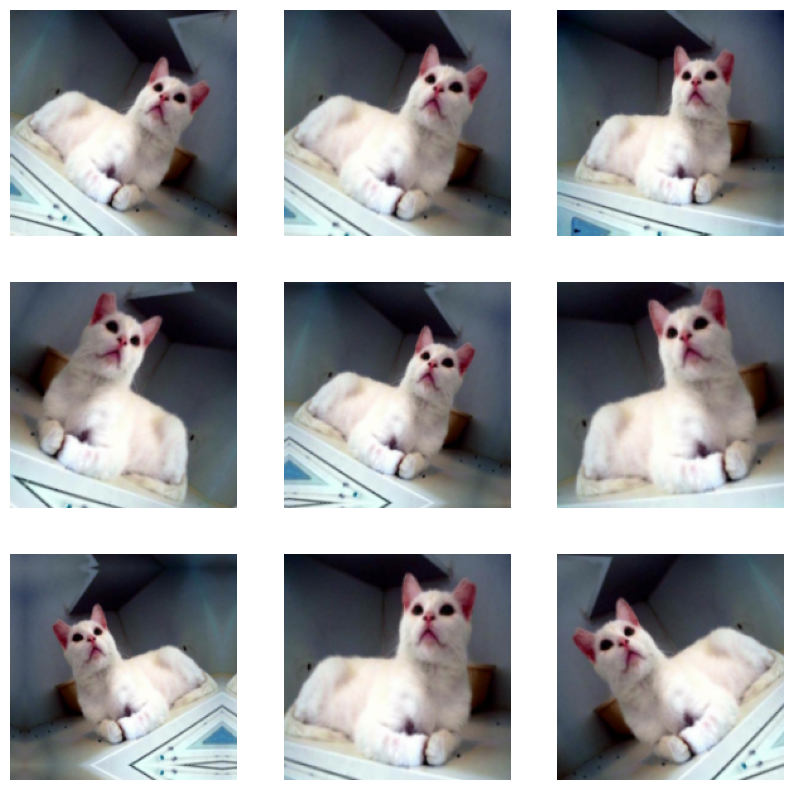

In [24]:
#Display some randomly augmented training image
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
    for i in range(9):
        augmented_pics = data_augmentation1(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_pics[0].numpy().astype("uint8"))
        plt.axis("off")

 Defining a new convnet that includes image augmentation and dropout

In [25]:
# import the keras network library
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Dropout, Rescaling, MaxPool2D

# Build the model
model1 = Sequential()

# Add the data augmentation layer
model1.add(data_augmentation1)

# Add a rescaling layer to scale input values to [0, 1]
model1.add(Rescaling(scale=1./255, input_shape=(180, 180, 3)))

# Add a convolutional layer
model1.add(Conv2D(32,kernel_size=3,activation='relu'))
# add maxpooling
model1.add(MaxPool2D(2))

# Add another convolutional layer
model1.add(Conv2D(64,kernel_size=3,activation='relu'))
# add maxpooling
model1.add(MaxPool2D(2))

# Add a convolutional layer
model1.add(Conv2D(128,kernel_size=3,activation='relu'))
# add maxpooling
model1.add(MaxPool2D(2))

# Add a convolutional layer
model1.add(Conv2D(256,kernel_size=3,activation='relu'))
# add maxpooling
model1.add(MaxPool2D(2))

# Add a convolutional layer
model1.add(Conv2D(256,kernel_size=3,activation='relu'))

# Flatten and feed to output layer
model1.add(Flatten())

#dropout layer
model1.add(Dropout(0.25))

#output layer
model1.add(Dense(1, activation='sigmoid'))

Compiling the model

In [26]:
model1.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Fitting the model with data augmentation using a Dataset size =1000

In [27]:
# import the keras network library
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping

callback1_aug = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
# fit the model
history1_aug = model1.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callback1_aug)

Epoch 1/20
63/63 [==============================] - 6s 63ms/step - loss: 0.6967 - accuracy: 0.5195 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 5s 81ms/step - loss: 0.6960 - accuracy: 0.5390 - val_loss: 0.6810 - val_accuracy: 0.5270
Epoch 3/20
63/63 [==============================] - 6s 85ms/step - loss: 0.6857 - accuracy: 0.5735 - val_loss: 0.6803 - val_accuracy: 0.5560
Epoch 4/20
63/63 [==============================] - 4s 60ms/step - loss: 0.6754 - accuracy: 0.5950 - val_loss: 0.6532 - val_accuracy: 0.6030
Epoch 5/20
63/63 [==============================] - 4s 61ms/step - loss: 0.6587 - accuracy: 0.6135 - val_loss: 0.6302 - val_accuracy: 0.6450
Epoch 6/20
63/63 [==============================] - 6s 96ms/step - loss: 0.6296 - accuracy: 0.6375 - val_loss: 0.6043 - val_accuracy: 0.6810
Epoch 7/20
63/63 [==============================] - 4s 59ms/step - loss: 0.6376 - accuracy: 0.6515 - val_loss: 0.5878 - val_accuracy: 0.6810
Epoch 8/20
63

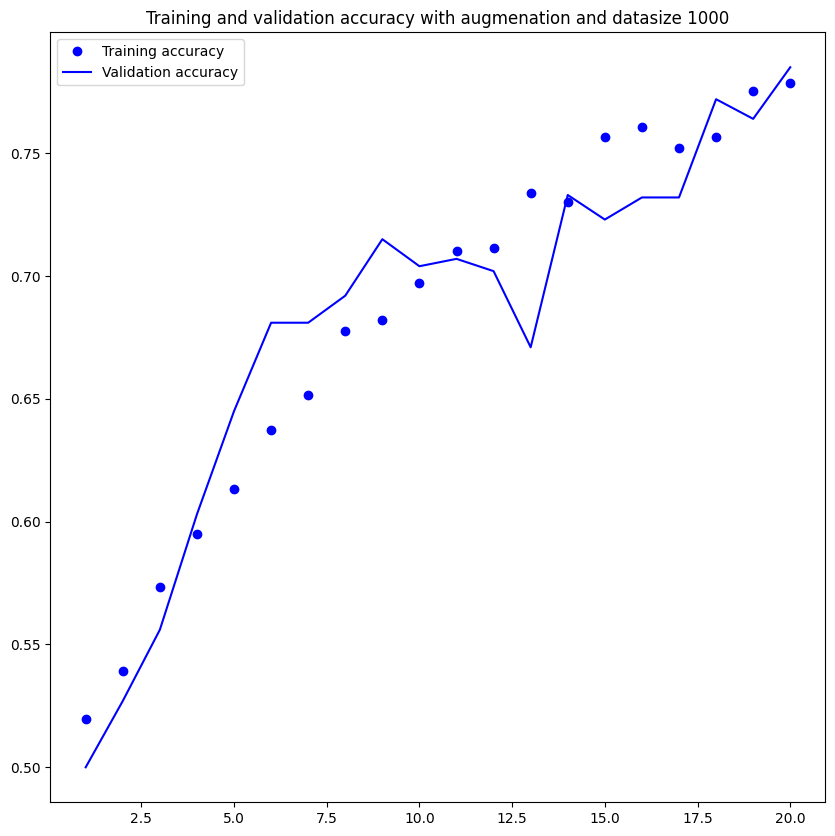

<Figure size 640x480 with 0 Axes>

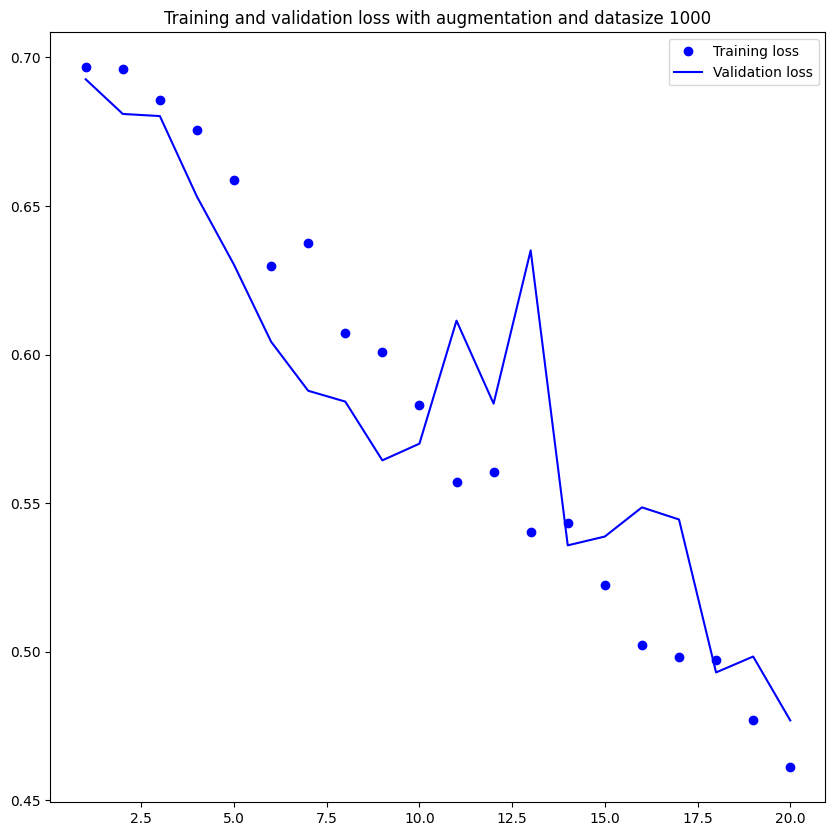

In [100]:
#import pyplot library
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
accuracy1 = history1_aug.history["accuracy"]
val_accuracy1 = history1_aug.history["val_accuracy"]
loss1 = history1_aug.history["loss"]
val_loss1 = history1_aug.history["val_loss"]
epochs = range(1, len(accuracy1) + 1)

#plot the traing and vlidation accuracies
plt.plot(epochs, accuracy1, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy1, "b", label="Validation accuracy")
plt.title("Training and validation accuracy with augmenation and datasize 1000")
plt.legend()
plt.figure()

#plot the traing and vlidation losses
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss1, "bo", label="Training loss")
plt.plot(epochs, val_loss1, "b", label="Validation loss")
plt.title("Training and validation loss with augmentation and datasize 1000")
plt.legend()
plt.show()

Evaluating the model with data augmentation on the test set with datasize=1000

In [28]:
#evaluate the model
test_model1_aug = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_accuracy1_aug = test_model1_aug.evaluate(test_data)
print(f"Test accuracy1_aug: {test_accuracy1_aug:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.5047 - accuracy: 0.7590
Test accuracy1_aug: 0.759


2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?

Copying images to training, validation, and test directories with dataset size for training 1500

In [29]:
#import the required libraries
import os, shutil, pathlib

#assign the data to directories
original_directory = pathlib.Path("train")
new_base_directory = pathlib.Path("cats_vs_dogs_small_2")

def subset_main(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_directory / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_directory / fname,
                            dst=dir / fname)

#split the data to training, validation abd test datasets
subset_main("train", start_index=158, end_index=1658)
subset_main("validation", start_index=1659, end_index=2159)
subset_main("test", start_index=2160, end_index=2660)

Using image_dataset_from_directory to read images

In [30]:
from tensorflow.keras.utils import image_dataset_from_directory
#assign the data to datasets
train_data2 = image_dataset_from_directory(new_base_directory / "train", image_size=(180, 180),batch_size=32)
validation_data2 = image_dataset_from_directory(new_base_directory / "validation", image_size=(180, 180), batch_size=32)
test_data2 = image_dataset_from_directory(new_base_directory / "test", image_size=(180, 180), batch_size=32)

Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Instantiating a small convnet for dogs vs. cats classification with dropout

In [31]:
# import the keras network library
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Dropout, Rescaling, MaxPool2D

model2 = Sequential()

# Add a rescaling layer to scale input values to [0, 1]
model2.add(Rescaling(scale=1./255, input_shape=(180, 180, 3)))

# Add a convolutional layer
model2.add(Conv2D(32,kernel_size=3,activation='relu'))
# add maxpooling layer
model2.add(MaxPool2D(2))

# Add another convolutional layer
model2.add(Conv2D(64,kernel_size=3,activation='relu'))
# add maxpooling layer
model2.add(MaxPool2D(2))

# Add a convolutional layer
model2.add(Conv2D(128,kernel_size=3,activation='relu'))
# add maxpooling layer
model2.add(MaxPool2D(2))

# Add a convolutional layer
model2.add(Conv2D(256,kernel_size=3,activation='relu'))
# add maxpooling layer
model2.add(MaxPool2D(2))

# Add a convolutional layer
model2.add(Conv2D(256,kernel_size=3,activation='relu'))

# Flatten and feed to output layer
model2.add(Flatten())
# adding the dropout layer to reduce overfitting
model2.add(Dropout(0.25))
# adding the output layer
model2.add(Dense(1, activation='sigmoid'))

Compiling the model2

In [32]:
model2.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

Fitting the model2 using a Dataset with size 1500

In [33]:
# import the keras network library
from keras.callbacks import ModelCheckpoint, EarlyStopping
callback2 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch2.keras",
        save_best_only=True,
        monitor="val_loss")
]
#fit the model
history2 = model2.fit(
    train_data2,
    epochs=20,
    validation_data=validation_data2,
    callbacks=callback2)

Epoch 1/20
94/94 [==============================] - 10s 87ms/step - loss: 0.6974 - accuracy: 0.5223 - val_loss: 0.6908 - val_accuracy: 0.5520
Epoch 2/20
94/94 [==============================] - 7s 66ms/step - loss: 0.6909 - accuracy: 0.5437 - val_loss: 0.6926 - val_accuracy: 0.5020
Epoch 3/20
94/94 [==============================] - 5s 55ms/step - loss: 0.6664 - accuracy: 0.6070 - val_loss: 0.6733 - val_accuracy: 0.5900
Epoch 4/20
94/94 [==============================] - 8s 78ms/step - loss: 0.6387 - accuracy: 0.6457 - val_loss: 0.6456 - val_accuracy: 0.5930
Epoch 5/20
94/94 [==============================] - 5s 55ms/step - loss: 0.6045 - accuracy: 0.6733 - val_loss: 0.5822 - val_accuracy: 0.7190
Epoch 6/20
94/94 [==============================] - 7s 70ms/step - loss: 0.5809 - accuracy: 0.7040 - val_loss: 0.5747 - val_accuracy: 0.7030
Epoch 7/20
94/94 [==============================] - 7s 71ms/step - loss: 0.5210 - accuracy: 0.7480 - val_loss: 0.5782 - val_accuracy: 0.7190
Epoch 8/20
9

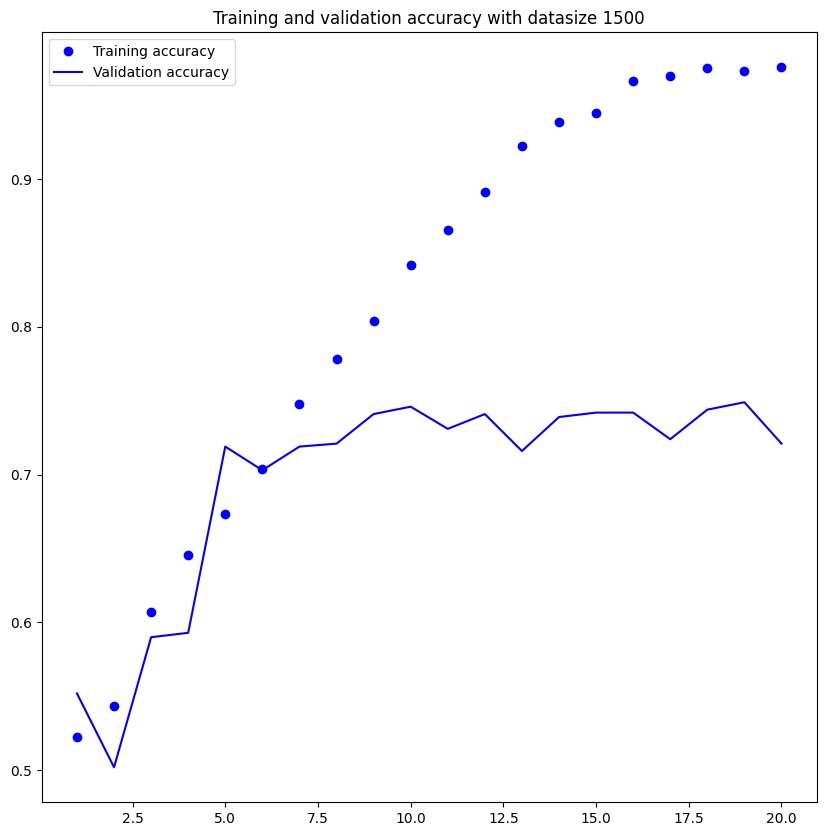

<Figure size 640x480 with 0 Axes>

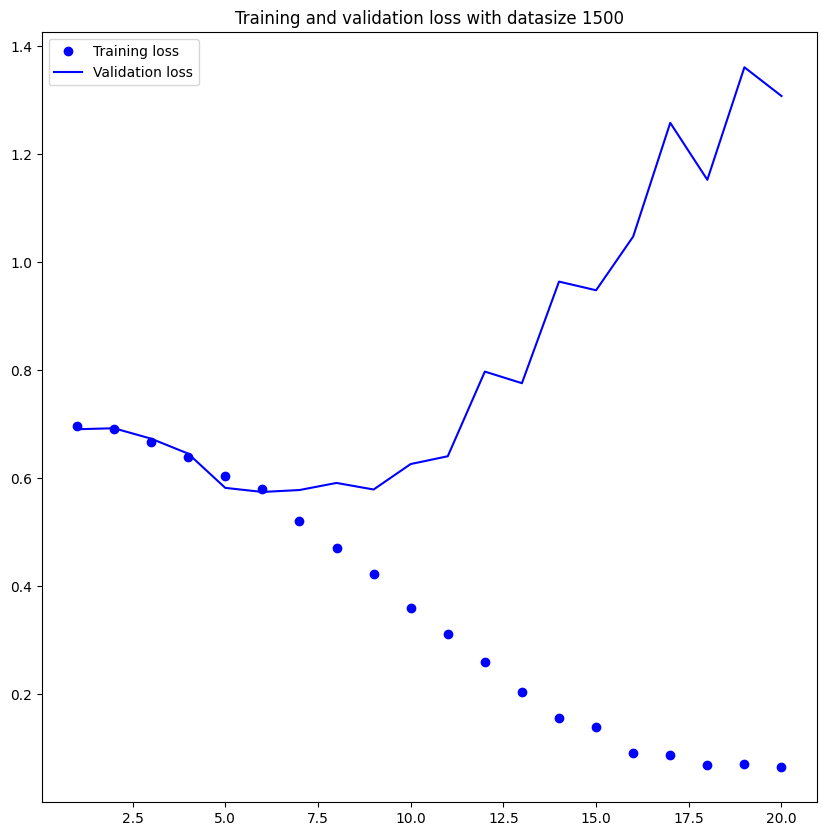

In [94]:
#import pyplot library
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
accuracy1 = history2.history["accuracy"]
val_accuracy1 = history2.history["val_accuracy"]
loss1 = history2.history["loss"]
val_loss1 = history2.history["val_loss"]
epochs = range(1, len(accuracy1) + 1)

#plot the traing and vlidation accuracies
plt.plot(epochs, accuracy1, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy1, "b", label="Validation accuracy")
plt.title("Training and validation accuracy with datasize 1500")
plt.legend()
plt.figure()

#plot the traing and vlidation losses
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss1, "bo", label="Training loss")
plt.plot(epochs, val_loss1, "b", label="Validation loss")
plt.title("Training and validation loss with datasize 1500")
plt.legend()
plt.show()

Evaluating the model on the test set with datasize=1500

In [34]:
#evaluate the model
test_model2 = keras.models.load_model(
    "convnet_from_scratch2.keras")
test_loss, test_accuracy2 = test_model2.evaluate(test_data2)
print(f"Test accuracy2: {test_accuracy2:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.5763 - accuracy: 0.7130
Test accuracy2: 0.713


Evaluating the model on the test set with datasize=1500

In [35]:
#  dataaugmentation layers
data_augmentation2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Displaying some randomly augmented training image

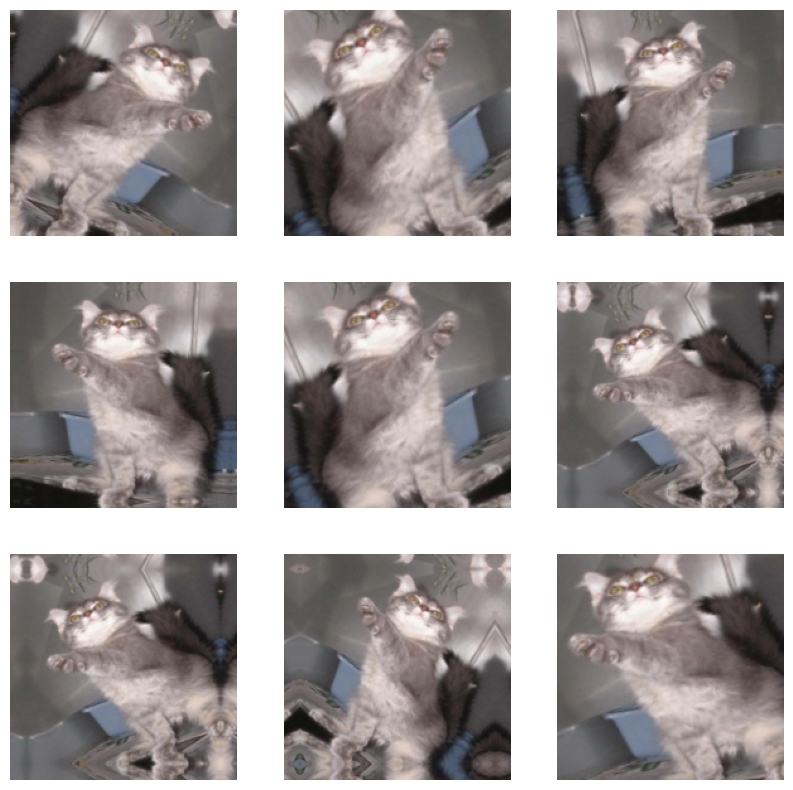

In [36]:
#Display some randomly augmented training image
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
    for i in range(9):
        augmented_pics = data_augmentation2(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_pics[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
 Defining a new convnet that includes image augmentation and dropout

In [37]:
# import the keras network library
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Dropout, Rescaling, MaxPool2D

# Build the model
model2 = Sequential()

# Add the data augmentation layer
model2.add(data_augmentation2)

# Add a rescaling layer to scale input values to [0, 1]
model2.add(Rescaling(scale=1./255, input_shape=(180, 180, 3)))

# Add a convolutional layer
model2.add(Conv2D(32,kernel_size=3,activation='relu'))
# add maxpooling
model2.add(MaxPool2D(2))

# Add another convolutional layer
model2.add(Conv2D(64,kernel_size=3,activation='relu'))
# add maxpooling
model2.add(MaxPool2D(2))


# Add a convolutional layer
model2.add(Conv2D(128,kernel_size=3,activation='relu'))
# add maxpooling
model2.add(MaxPool2D(2))


# Add a convolutional layer
model2.add(Conv2D(256,kernel_size=3,activation='relu'))
# add maxpooling
model2.add(MaxPool2D(2))


# Add a convolutional layer
model2.add(Conv2D(256,kernel_size=3,activation='relu'))

# Flatten and feed to output layer
model2.add(Flatten())

# add the dropout layer
model2.add(Dropout(0.25))

# add the output layer
model2.add(Dense(1, activation='sigmoid'))



Compiling the model with dataaugmentation

In [38]:
model2.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

Fitting the model with data augmentation using a Dataset size =1500

In [39]:
callbacks2_aug = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation2.keras",
        save_best_only=True,
        monitor="val_loss")
]
# fit the model
history2_aug = model2.fit(
    train_data2,
    epochs=20,
    validation_data=validation_data2,
    callbacks=callbacks2_aug)

Epoch 1/20
94/94 [==============================] - 12s 85ms/step - loss: 0.6955 - accuracy: 0.5027 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/20
94/94 [==============================] - 6s 57ms/step - loss: 0.6951 - accuracy: 0.5183 - val_loss: 0.6898 - val_accuracy: 0.5470
Epoch 3/20
94/94 [==============================] - 9s 91ms/step - loss: 0.6902 - accuracy: 0.5430 - val_loss: 0.6845 - val_accuracy: 0.5280
Epoch 4/20
94/94 [==============================] - 8s 78ms/step - loss: 0.6727 - accuracy: 0.5803 - val_loss: 0.6547 - val_accuracy: 0.6350
Epoch 5/20
94/94 [==============================] - 13s 140ms/step - loss: 0.6493 - accuracy: 0.6400 - val_loss: 0.6170 - val_accuracy: 0.6640
Epoch 6/20
94/94 [==============================] - 7s 68ms/step - loss: 0.6366 - accuracy: 0.6527 - val_loss: 0.6084 - val_accuracy: 0.6740
Epoch 7/20
94/94 [==============================] - 9s 90ms/step - loss: 0.6192 - accuracy: 0.6670 - val_loss: 0.6297 - val_accuracy: 0.6200
Epoch 8/20

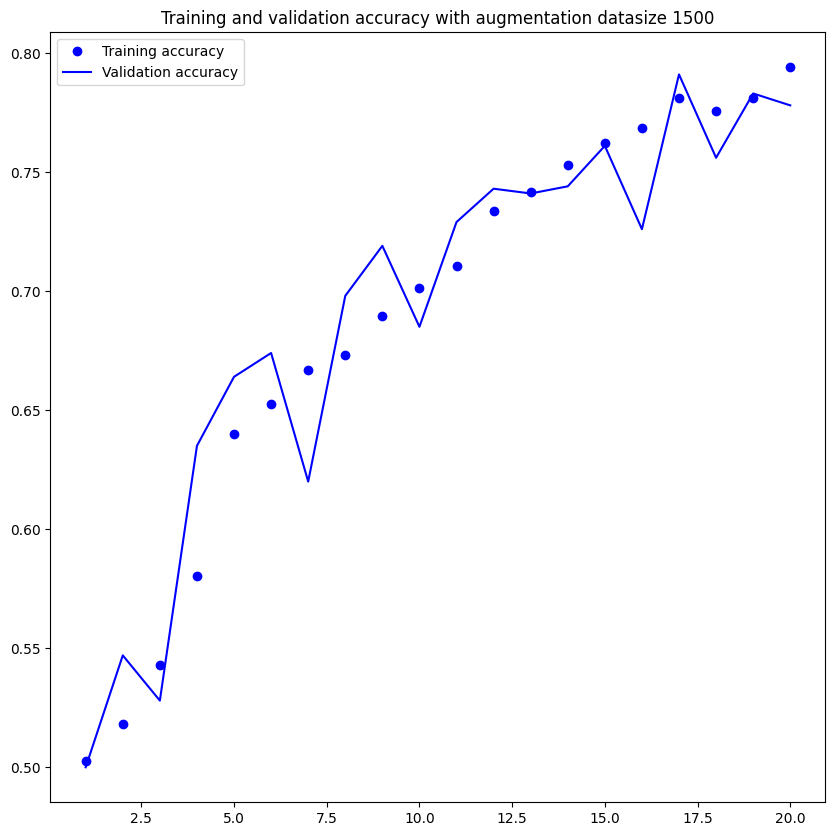

<Figure size 640x480 with 0 Axes>

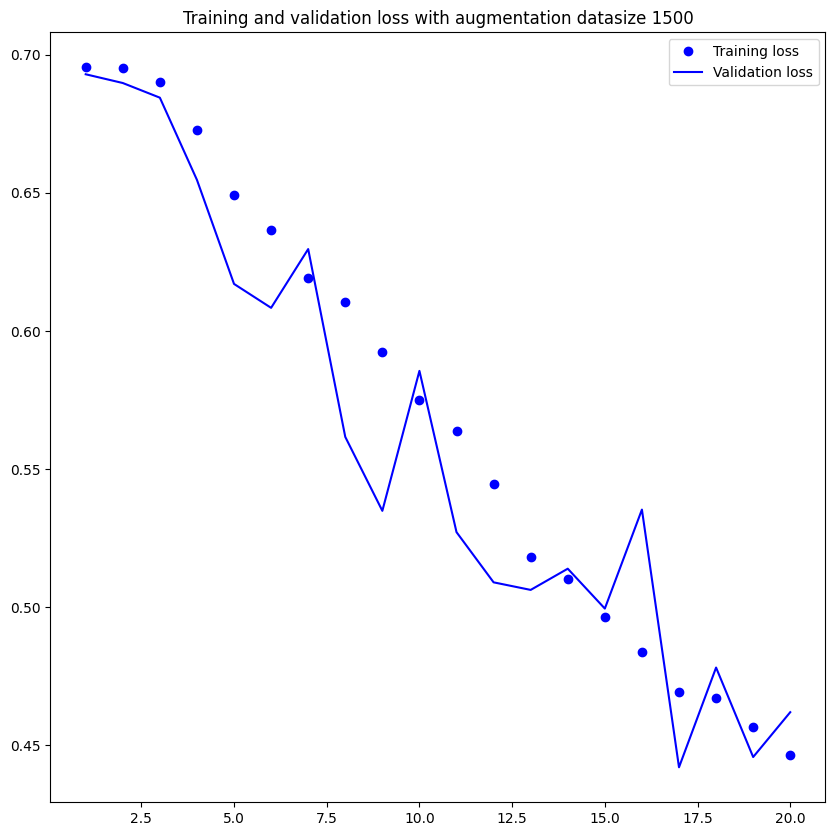

In [96]:
#import pyplot library
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
accuracy1 = history2_aug.history["accuracy"]
val_accuracy1 = history2_aug.history["val_accuracy"]
loss1 = history2_aug.history["loss"]
val_loss1 = history2_aug.history["val_loss"]
epochs = range(1, len(accuracy1) + 1)

#plot the traing and vlidation accuracies
plt.plot(epochs, accuracy1, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy1, "b", label="Validation accuracy")
plt.title("Training and validation accuracy with augmentation datasize 1500")
plt.legend()
plt.figure()

#plot the traing and vlidation losses
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss1, "bo", label="Training loss")
plt.plot(epochs, val_loss1, "b", label="Validation loss")
plt.title("Training and validation loss with augmentation datasize 1500")
plt.legend()
plt.show()

Evaluating the model with data augmentation on the test set with datasize=1500

In [40]:
#evaluate the model
test_model2_aug = keras.models.load_model(
    "convnet_from_scratch_with_augmentation2.keras")
test_loss, test_accuracy2_aug = test_model2_aug.evaluate(test_data2)
print(f"Test accuracy2_aug: {test_accuracy2_aug:.3f}")

32/32 [==============================] - 2s 52ms/step - loss: 0.4674 - accuracy: 0.7850
Test accuracy2_aug: 0.785


3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

Copying images to training, validation, and test directories with dataset size for training 2000

In [42]:
#import the required libraries
import os, shutil, pathlib

#assign the data to directories
original_directory = pathlib.Path("train")
new_base_directory = pathlib.Path("cats_vs_dogs_small_3")

def subset_main(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_directory / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_directory / fname,
                            dst=dir / fname)

#split the data to training, validation abd test datasets
subset_main("train", start_index=158, end_index=2158)
subset_main("validation", start_index=2159, end_index=2659)
subset_main("test", start_index=2660, end_index=3160)

Using image_dataset_from_directory to read images

In [43]:
from tensorflow.keras.utils import image_dataset_from_directory

#assign the data to datasets
train_data3 = image_dataset_from_directory(new_base_directory / "train", image_size=(180, 180),batch_size=32)
validation_data3 = image_dataset_from_directory(new_base_directory / "validation", image_size=(180, 180), batch_size=32)
test_data3 = image_dataset_from_directory(new_base_directory / "test", image_size=(180, 180), batch_size=32)

Found 4000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Instantiating a small convnet for dogs vs. cats classification with dropout

In [44]:
# import the keras network library
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Dropout, Rescaling, MaxPool2D

model3 = Sequential()

# Add a rescaling layer to scale input values to [0, 1]
model3.add(Rescaling(scale=1./255, input_shape=(180, 180, 3)))

# Add a convolutional layer
model3.add(Conv2D(32,kernel_size=3,activation='relu'))
# add maxpooling layer
model3.add(MaxPool2D(2))

# Add another convolutional layer
model3.add(Conv2D(64,kernel_size=3,activation='relu'))
# add maxpooling layer
model3.add(MaxPool2D(2))

# Add a convolutional layer
model3.add(Conv2D(128,kernel_size=3,activation='relu'))
# add maxpooling layer
model3.add(MaxPool2D(2))

# Add a convolutional layer
model3.add(Conv2D(256,kernel_size=3,activation='relu'))
# add maxpooling layer
model3.add(MaxPool2D(2))

# Add a convolutional layer
model3.add(Conv2D(256,kernel_size=3,activation='relu'))



# Flatten and feed to output layer
model3.add(Flatten())
# adding the dropout layer to reduce overfitting
model3.add(Dropout(0.25))
# adding the output layer
model3.add(Dense(1, activation='sigmoid'))

Compiling the model3

In [45]:
model3.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

Fitting the model3 using a Dataset with size 2000

In [46]:
#import the keras network library
from keras.callbacks import ModelCheckpoint, EarlyStopping
callback3 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch3.keras",
        save_best_only=True,
        monitor="val_loss")
]

#fit the model
history3 = model3.fit(
    train_data3,
    epochs=20,
    validation_data=validation_data3,
    callbacks=callback3)

Epoch 1/20
125/125 [==============================] - 8s 52ms/step - loss: 0.6975 - accuracy: 0.5210 - val_loss: 0.6809 - val_accuracy: 0.5450
Epoch 2/20
125/125 [==============================] - 10s 76ms/step - loss: 0.6681 - accuracy: 0.6005 - val_loss: 0.6413 - val_accuracy: 0.6550
Epoch 3/20
125/125 [==============================] - 7s 55ms/step - loss: 0.6159 - accuracy: 0.6570 - val_loss: 0.6026 - val_accuracy: 0.6770
Epoch 4/20
125/125 [==============================] - 10s 79ms/step - loss: 0.5707 - accuracy: 0.7030 - val_loss: 0.5607 - val_accuracy: 0.7160
Epoch 5/20
125/125 [==============================] - 10s 77ms/step - loss: 0.5331 - accuracy: 0.7423 - val_loss: 0.5115 - val_accuracy: 0.7290
Epoch 6/20
125/125 [==============================] - 8s 60ms/step - loss: 0.5003 - accuracy: 0.7582 - val_loss: 0.5285 - val_accuracy: 0.7510
Epoch 7/20
125/125 [==============================] - 8s 62ms/step - loss: 0.4633 - accuracy: 0.7815 - val_loss: 0.5264 - val_accuracy: 0.7

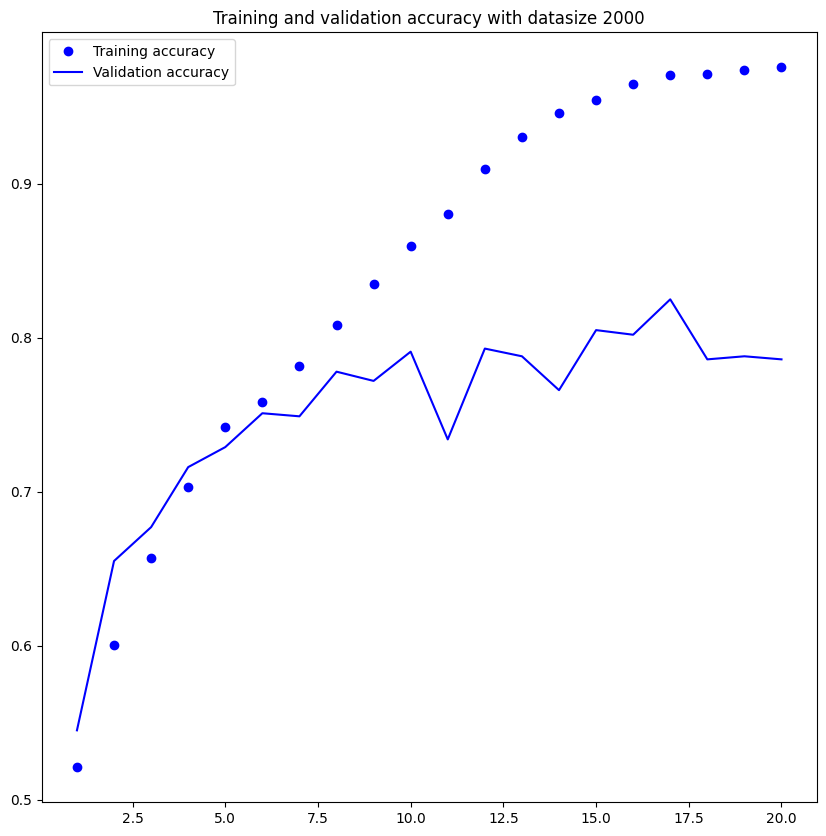

<Figure size 640x480 with 0 Axes>

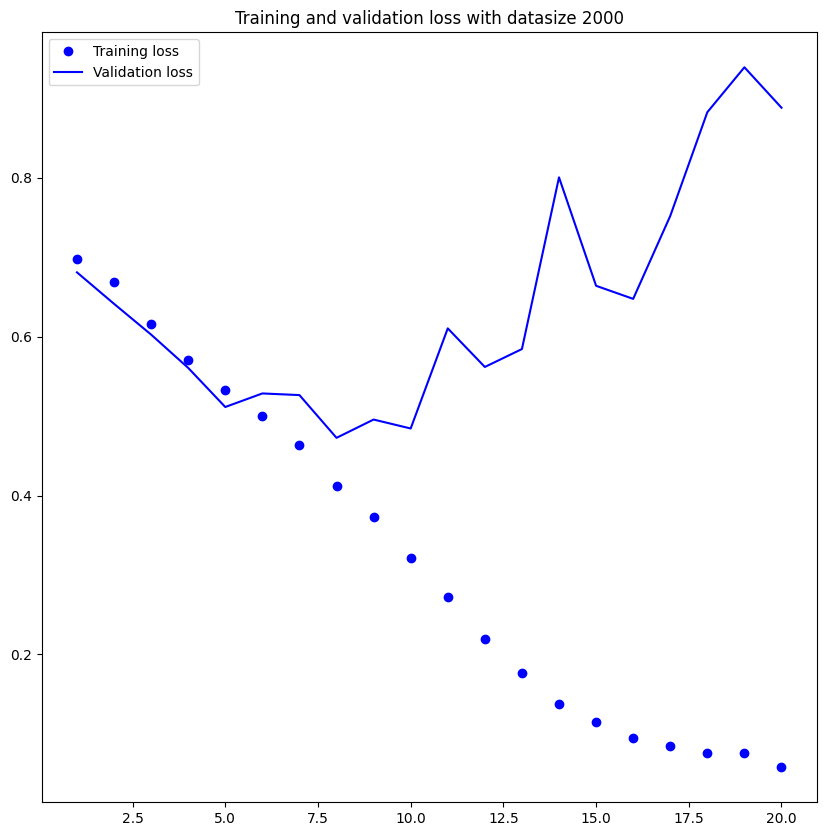

In [95]:
#import pyplot library
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
accuracy1 = history3.history["accuracy"]
val_accuracy1 = history3.history["val_accuracy"]
loss1 = history3.history["loss"]
val_loss1 = history3.history["val_loss"]
epochs = range(1, len(accuracy1) + 1)

#plot the traing and vlidation accuracies
plt.plot(epochs, accuracy1, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy1, "b", label="Validation accuracy")
plt.title("Training and validation accuracy with datasize 2000")
plt.legend()
plt.figure()

#plot the traing and vlidation losses
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss1, "bo", label="Training loss")
plt.plot(epochs, val_loss1, "b", label="Validation loss")
plt.title("Training and validation loss with datasize 2000")
plt.legend()
plt.show()

Evaluating the model on the test set with datasize=2000

In [47]:
#evaluate the model
test_model3 = keras.models.load_model(
    "convnet_from_scratch3.keras")
test_loss, test_accuracy3 = test_model3.evaluate(test_data3)
print(f"Test accuracy3: {test_accuracy3:.3f}")

32/32 [==============================] - 1s 28ms/step - loss: 0.5106 - accuracy: 0.7710
Test accuracy3: 0.771


Evaluating the model on the test set with datasize=2000

In [48]:
#  dataaugmentation layers
data_augmentation3 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Defining a new convnet that includes image augmentation and dropout

In [49]:
# import the keras network library
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Dropout, Rescaling, MaxPool2D

model3 = Sequential()

# Add the data augmentation layer
model3.add(data_augmentation3)

# Add a rescaling layer to scale input values to [0, 1]
model3.add(Rescaling(scale=1./255, input_shape=(180, 180, 3)))

# Add a convolutional layer
model3.add(Conv2D(32,kernel_size=3,activation='relu'))
# add maxpooling
model3.add(MaxPool2D(2))

# Add another convolutional layer
model3.add(Conv2D(64,kernel_size=3,activation='relu'))
# add maxpooling
model3.add(MaxPool2D(2))

# Add a convolutional layer
model3.add(Conv2D(128,kernel_size=3,activation='relu'))
# add maxpooling
model3.add(MaxPool2D(2))

# Add a convolutional layer
model3.add(Conv2D(256,kernel_size=3,activation='relu'))
# add maxpooling
model3.add(MaxPool2D(2))

# Add a convolutional layer
model3.add(Conv2D(256,kernel_size=3,activation='relu'))



# Flatten and feed to output layer
model3.add(Flatten())
# add the dropout layer
model3.add(Dropout(0.25))
# add the output layer
model3.add(Dense(1, activation='sigmoid'))

Compiling the model with dataaugmentation

In [50]:
model3.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

Fitting the model with data augmentation using a Dataset size =2000

In [51]:
callbacks3_aug = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation3.keras",
        save_best_only=True,
        monitor="val_loss")
]

#fit the model
history3_aug = model3.fit(
    train_data3,
    epochs=20,
    validation_data=validation_data3,
    callbacks=callbacks3_aug)

Epoch 1/20
125/125 [==============================] - 12s 78ms/step - loss: 0.6999 - accuracy: 0.5175 - val_loss: 0.6895 - val_accuracy: 0.5450
Epoch 2/20
125/125 [==============================] - 10s 75ms/step - loss: 0.6925 - accuracy: 0.5627 - val_loss: 0.6658 - val_accuracy: 0.6240
Epoch 3/20
125/125 [==============================] - 9s 67ms/step - loss: 0.6589 - accuracy: 0.6263 - val_loss: 0.6466 - val_accuracy: 0.6180
Epoch 4/20
125/125 [==============================] - 7s 52ms/step - loss: 0.6427 - accuracy: 0.6342 - val_loss: 0.6404 - val_accuracy: 0.6200
Epoch 5/20
125/125 [==============================] - 13s 99ms/step - loss: 0.6258 - accuracy: 0.6645 - val_loss: 0.5886 - val_accuracy: 0.6790
Epoch 6/20
125/125 [==============================] - 9s 68ms/step - loss: 0.6040 - accuracy: 0.6765 - val_loss: 0.5856 - val_accuracy: 0.7000
Epoch 7/20
125/125 [==============================] - 11s 87ms/step - loss: 0.5771 - accuracy: 0.6933 - val_loss: 0.6146 - val_accuracy: 0.

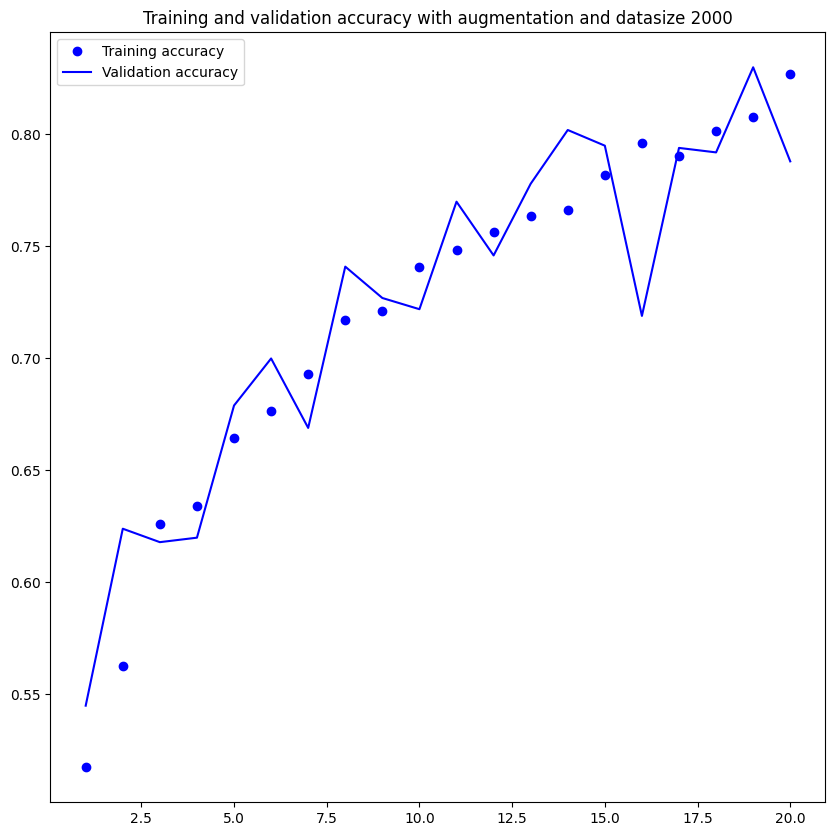

<Figure size 640x480 with 0 Axes>

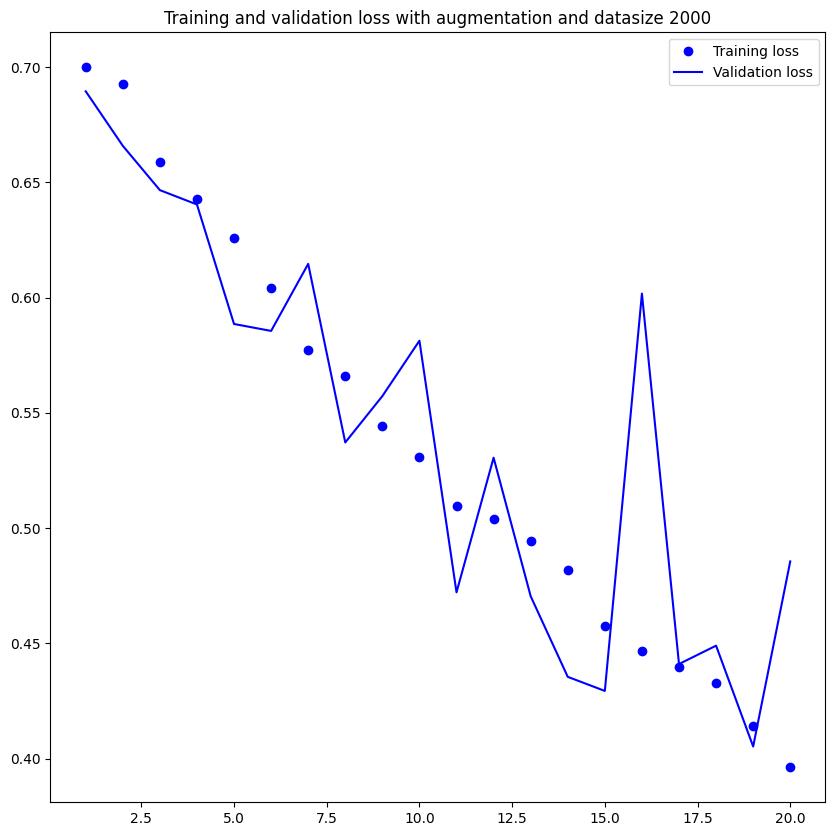

In [98]:
#import pyplot library
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
accuracy1 = history3_aug.history["accuracy"]
val_accuracy1 = history3_aug.history["val_accuracy"]
loss1 = history3_aug.history["loss"]
val_loss1 = history3_aug.history["val_loss"]
epochs = range(1, len(accuracy1) + 1)

#plot the traing and vlidation accuracies
plt.plot(epochs, accuracy1, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy1, "b", label="Validation accuracy")
plt.title("Training and validation accuracy with augmentation and datasize 2000")
plt.legend()
plt.figure()

#plot the traing and vlidation losses
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss1, "bo", label="Training loss")
plt.plot(epochs, val_loss1, "b", label="Validation loss")
plt.title("Training and validation loss with augmentation and datasize 2000")
plt.legend()
plt.show()

Evaluating the model with data augmentation on the test set with datasize=2000

In [52]:
# evaluate the model
test_model3_aug = keras.models.load_model(
    "convnet_from_scratch_with_augmentation3.keras")
test_loss, test_accuracy3_aug = test_model3_aug.evaluate(test_data3)
print(f"Test accuracy3_aug: {test_accuracy3_aug:.3f}")

32/32 [==============================] - 1s 28ms/step - loss: 0.4238 - accuracy: 0.8320
Test accuracy3_aug: 0.832


4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.


 Instantiating the VGG16 convolutional base


In [53]:
convolution_base = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False,
 input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


Extracting the VGG16 features and corresponding labels

In [54]:
#Extracting the VGG16 features and corresponding labels
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = convolution_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)
# assign the faetures and labels
train_features, train_labels =  get_features_and_labels(train_data)
val_features, val_labels =  get_features_and_labels(validation_data)
test_features, test_labels =  get_features_and_labels(test_data)

# shape of data
train_features.shape

1/1 [==============================] - 0s 19ms/step


(2000, 5, 5, 512)

summary of convolution base vgg16

In [55]:
convolution_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

Defining and training the densely connected classifier

In [56]:
# input layer
inputs11 = keras.Input(shape=(5, 5, 512))

# flatten the input layer
x = layers.Flatten()(inputs11)
x = layers.Dense(256)(x)

# dropout layer to reduce overfitting
x = layers.Dropout(0.25)(x)

# output layer
outputs11 = layers.Dense(1, activation="sigmoid")(x)
model11= keras.Model(inputs11, outputs11)

# compile the model
model11.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callback11 = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction11.keras",
      save_best_only=True,
      monitor="val_loss")
]

# fit the model
history11 = model11.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callback11)

Epoch 1/20
63/63 [==============================] - 2s 17ms/step - loss: 18.9785 - accuracy: 0.9280 - val_loss: 10.8500 - val_accuracy: 0.9490
Epoch 2/20
63/63 [==============================] - 1s 13ms/step - loss: 3.1102 - accuracy: 0.9770 - val_loss: 6.1965 - val_accuracy: 0.9620
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 2.2029 - accuracy: 0.9845 - val_loss: 5.4960 - val_accuracy: 0.9700
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2922 - accuracy: 0.9885 - val_loss: 10.1200 - val_accuracy: 0.9540
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.3214 - accuracy: 0.9905 - val_loss: 4.2019 - val_accuracy: 0.9790
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.2854 - accuracy: 0.9980 - val_loss: 3.9619 - val_accuracy: 0.9780
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 5.1704e-14 - accuracy: 1.0000 - val_loss: 3.9619 - val_accuracy: 0.9780
Epoch 8/20

Plotting the results  with pretrained model with training datasize 1000

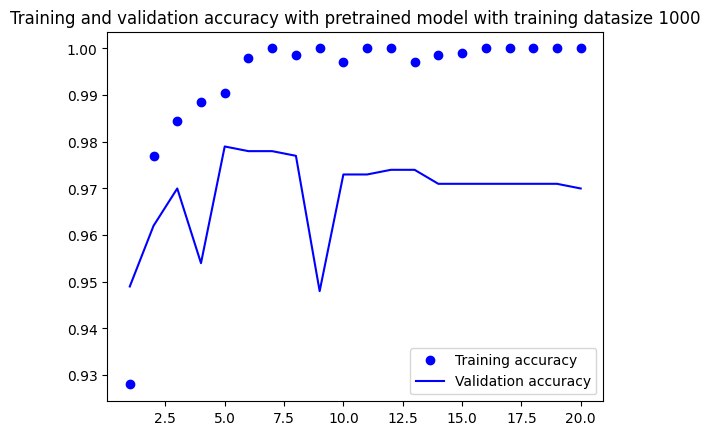

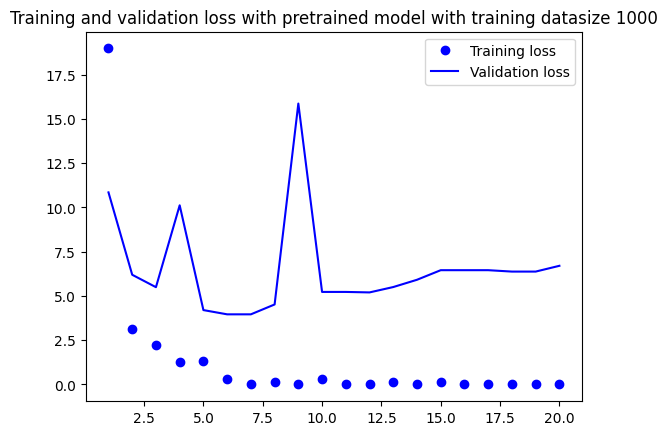

In [57]:
# import pyplot library
import matplotlib.pyplot as plt

acc = history11.history["accuracy"]
val_acc = history11.history["val_accuracy"]
loss = history11.history["loss"]
val_loss = history11.history["val_loss"]
epochs = range(1, len(acc) + 1)

# plot Training and validation accuracy
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy with pretrained model with training datasize 1000")
plt.legend()
plt.figure()

# plot Training and validation loss
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss with pretrained model with training datasize 1000")
plt.legend()
plt.show()

Evaluate the pretrained model with datasize 1000

In [58]:
# Evaluate the model
test_accuracy11 = keras.models.load_model("feature_extraction11.keras",safe_mode=False)
test_loss, test_acc = test_accuracy11.evaluate(test_features, test_labels )
print(f"Test accuracy11: {test_acc:.3f}")

32/32 [==============================] - 0s 3ms/step - loss: 5.0704 - accuracy: 0.9780
Test accuracy11: 0.978


Instantiating and freezing the VGG16 convolutional bas

In [59]:
# Instantiating and freezing the VGG16 convolutional base
convolution_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
convolution_base.trainable = False

# Printing the list of trainable weights before and after freezing
convolution_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(convolution_base.trainable_weights))

convolution_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(convolution_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


Adding a data augmentation stage and a classifier to the convolutional base

In [60]:
# adding data augmentation layers
data_augmentation11 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# adding data augmentation layers to the classifier
input11 = keras.Input(shape=(180, 180, 3))
x1 = data_augmentation11(input11)
x1 =keras.layers.Lambda(
     lambda x: keras.applications.vgg16.preprocess_input(x))(x1)
x1 = convolution_base(x1)
x1 = layers.Flatten()(x1)
x1 = layers.Dense(256)(x1)
x1 = layers.Dropout(0.25)(x1)

# output layer
outputs11 = layers.Dense(1, activation="sigmoid")(x1)
model11 = keras.Model(input11, outputs11)

# compile the model
model11.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Fitting the dataset to pretreined model and classifer

In [61]:
callbacks11_aug = [
    keras.callbacks.ModelCheckpoint(
        filepath="features_extraction_with_augmentation11.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

# fir the model
history11_aug = model11.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks11_aug
)

Epoch 1/20
63/63 [==============================] - 12s 163ms/step - loss: 22.5352 - accuracy: 0.8925 - val_loss: 20.8008 - val_accuracy: 0.9000
Epoch 2/20
63/63 [==============================] - 10s 158ms/step - loss: 6.9668 - accuracy: 0.9475 - val_loss: 7.4280 - val_accuracy: 0.9620
Epoch 3/20
63/63 [==============================] - 12s 189ms/step - loss: 5.7615 - accuracy: 0.9580 - val_loss: 5.2251 - val_accuracy: 0.9630
Epoch 4/20
63/63 [==============================] - 10s 158ms/step - loss: 4.2757 - accuracy: 0.9580 - val_loss: 5.4000 - val_accuracy: 0.9650
Epoch 5/20
63/63 [==============================] - 12s 192ms/step - loss: 2.9075 - accuracy: 0.9630 - val_loss: 4.3663 - val_accuracy: 0.9690
Epoch 6/20
63/63 [==============================] - 12s 181ms/step - loss: 3.0771 - accuracy: 0.9690 - val_loss: 4.7527 - val_accuracy: 0.9640
Epoch 7/20
63/63 [==============================] - 12s 189ms/step - loss: 2.0053 - accuracy: 0.9735 - val_loss: 2.9587 - val_accuracy: 0.96

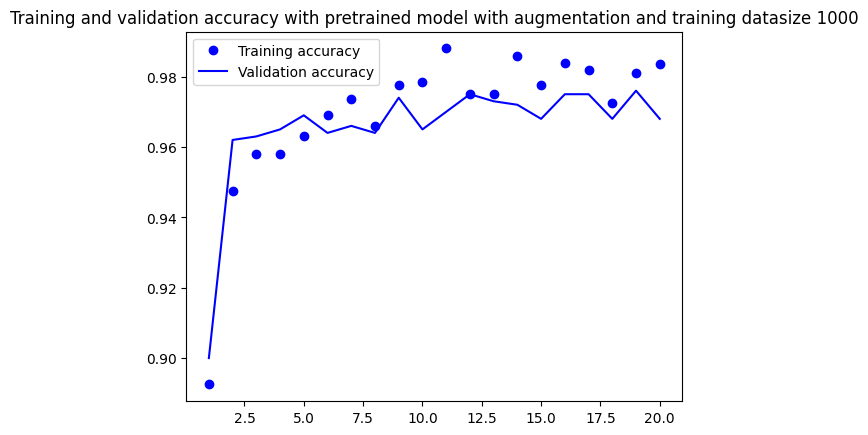

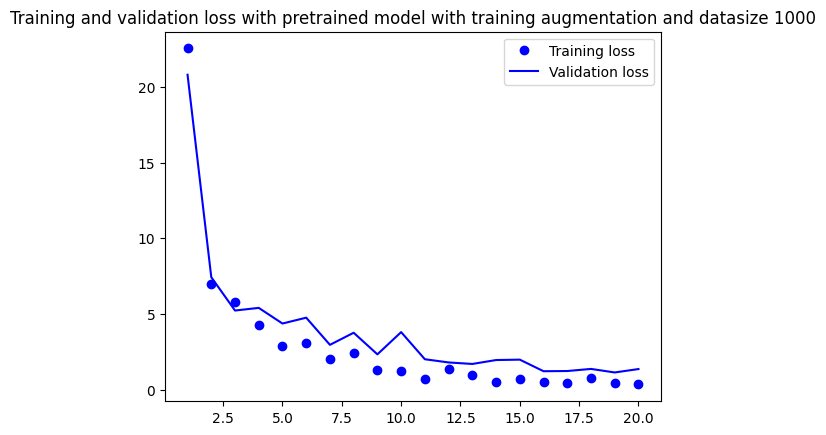

In [101]:
# import pyplot library
import matplotlib.pyplot as plt

acc = history11_aug.history["accuracy"]
val_acc = history11_aug.history["val_accuracy"]
loss = history11_aug.history["loss"]
val_loss = history11_aug.history["val_loss"]
epochs = range(1, len(acc) + 1)

# plot Training and validation accuracy
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy with pretrained model with augmentation and training datasize 1000")
plt.legend()
plt.figure()

# plot Training and validation loss
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss with pretrained model with training augmentation and datasize 1000")
plt.legend()
plt.show()

Evaluating the model on the test set

In [62]:
#Evaluating the model on the test set
test_accuracy11_aug = keras.models.load_model(
    "features_extraction_with_augmentation11.keras",safe_mode=False)
test_loss, test_acc = test_accuracy11_aug.evaluate(test_data)
print(f"Test accuracy11_aug: {test_acc:.3f}")

32/32 [==============================] - 3s 85ms/step - loss: 0.6151 - accuracy: 0.9790
Test accuracy11_aug: 0.979


Fine-tuning a pretrained model

Freezing all layers until the fourth from the last

In [63]:
# Freezing all layers until the fourth from the last
convolution_base.trainable = True
for layer in convolution_base.layers[:-4]:
    layer.trainable = False

Compiling and fitting the fine tunned model

In [64]:
# compile the model
model11.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks11_tune = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning11.keras",
        save_best_only=True,
        monitor="val_loss")
]
# fit the model
history11_tune = model11.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks11_tune)

Epoch 1/20
63/63 [==============================] - 15s 163ms/step - loss: 0.4591 - accuracy: 0.9815 - val_loss: 1.0266 - val_accuracy: 0.9710
Epoch 2/20
63/63 [==============================] - 13s 196ms/step - loss: 0.1713 - accuracy: 0.9875 - val_loss: 0.9989 - val_accuracy: 0.9740
Epoch 3/20
63/63 [==============================] - 11s 168ms/step - loss: 0.1177 - accuracy: 0.9920 - val_loss: 0.8592 - val_accuracy: 0.9720
Epoch 4/20
63/63 [==============================] - 10s 160ms/step - loss: 0.0802 - accuracy: 0.9925 - val_loss: 0.9738 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 10s 153ms/step - loss: 0.1626 - accuracy: 0.9890 - val_loss: 1.0939 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 11s 170ms/step - loss: 0.1556 - accuracy: 0.9885 - val_loss: 0.9417 - val_accuracy: 0.9750
Epoch 7/20
63/63 [==============================] - 13s 199ms/step - loss: 0.0324 - accuracy: 0.9960 - val_loss: 1.1570 - val_accuracy: 0.9710

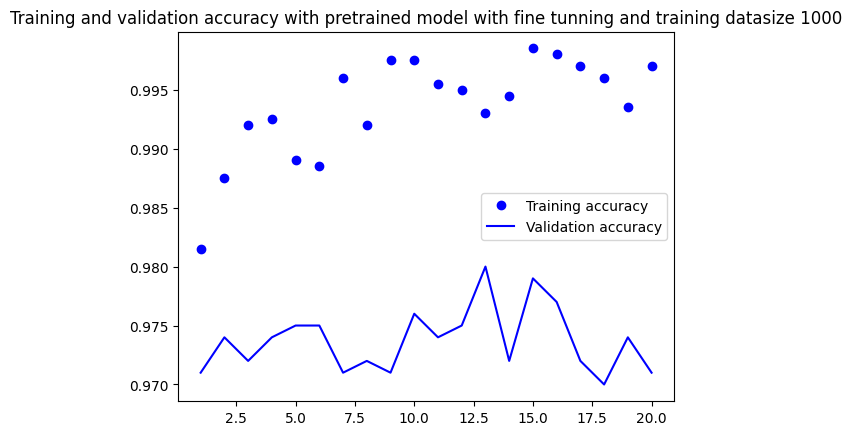

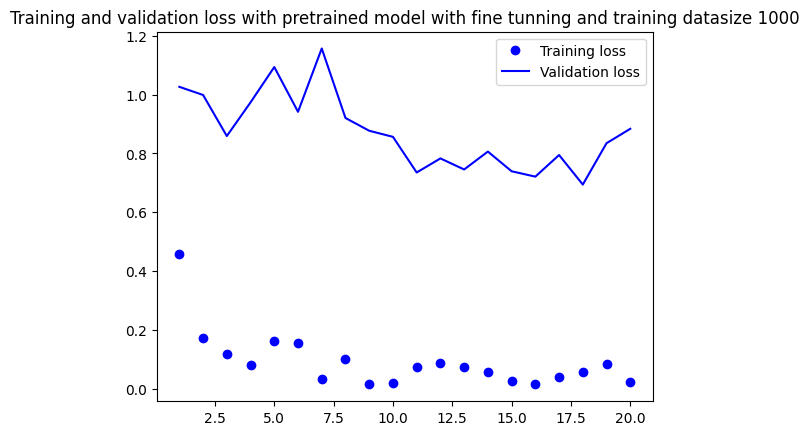

In [102]:
# import pyplot library
import matplotlib.pyplot as plt

acc = history11_tune.history["accuracy"]
val_acc = history11_tune.history["val_accuracy"]
loss = history11_tune.history["loss"]
val_loss = history11_tune.history["val_loss"]
epochs = range(1, len(acc) + 1)

# plot Training and validation accuracy
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy with pretrained model with fine tunning and training datasize 1000")
plt.legend()
plt.figure()

# plot Training and validation loss
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss with pretrained model with fine tunning and training datasize 1000")
plt.legend()
plt.show()

Evaluate the model with the test dataset

In [65]:
#evaluate the model
test_accuracy11_tune = keras.models.load_model("fine_tuning11.keras",safe_mode=False)
test_loss, test_acc = test_accuracy11_tune.evaluate(test_data)
print(f"Test accuracy11_tune: {test_acc:.3f}")

32/32 [==============================] - 3s 89ms/step - loss: 0.4652 - accuracy: 0.9820
Test accuracy11_tune: 0.982


Instantiating the VGG16 convolutional base for second dataset

In [66]:
# Instantiating the VGG16 convolutional base
convolution_base1 = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False,
 input_shape=(180, 180, 3))

#Extracting the VGG16 features and corresponding labels

In [67]:
#Extracting the VGG16 features and corresponding labels
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = convolution_base1.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)
# assign the faetures and labels
train_features2, train_labels2 =  get_features_and_labels(train_data2)
val_features2, val_labels2 =  get_features_and_labels(validation_data2)
test_features2, test_labels2 =  get_features_and_labels(test_data2)

# shape of data
train_features2.shape

1/1 [==============================] - 0s 46ms/step


(3000, 5, 5, 512)

Defining and training the densely connected classifier

In [68]:
# input layer
inputs22 = keras.Input(shape=(5, 5, 512))

# flatten the input layer
x2 = layers.Flatten()(inputs22)
x2 = layers.Dense(256)(x2)

# dropout layer to reduce overfitting
x2 = layers.Dropout(0.25)(x2)

# output layer
outputs22 = layers.Dense(1, activation="sigmoid")(x2)
model22= keras.Model(inputs22, outputs22)

# compile the model
model22.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callback22 = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction22.keras",
      save_best_only=True,
      monitor="val_loss")
]

# fit the model
history22 = model22.fit(
    train_features2, train_labels2,
    epochs=20,
    validation_data=(val_features2, val_labels2),
    callbacks=callback22)

Epoch 1/20
94/94 [==============================] - 3s 20ms/step - loss: 10.6834 - accuracy: 0.9367 - val_loss: 7.7693 - val_accuracy: 0.9550
Epoch 2/20
94/94 [==============================] - 1s 10ms/step - loss: 3.5152 - accuracy: 0.9750 - val_loss: 4.1838 - val_accuracy: 0.9790
Epoch 3/20
94/94 [==============================] - 1s 8ms/step - loss: 1.1091 - accuracy: 0.9907 - val_loss: 5.6222 - val_accuracy: 0.9690
Epoch 4/20
94/94 [==============================] - 1s 6ms/step - loss: 0.6621 - accuracy: 0.9923 - val_loss: 5.1370 - val_accuracy: 0.9750
Epoch 5/20
94/94 [==============================] - 0s 5ms/step - loss: 0.3484 - accuracy: 0.9963 - val_loss: 11.3298 - val_accuracy: 0.9560
Epoch 6/20
94/94 [==============================] - 1s 6ms/step - loss: 0.6845 - accuracy: 0.9957 - val_loss: 5.3065 - val_accuracy: 0.9790
Epoch 7/20
94/94 [==============================] - 1s 6ms/step - loss: 0.4026 - accuracy: 0.9963 - val_loss: 9.9402 - val_accuracy: 0.9700
Epoch 8/20
94/94

Plotting the results with pretrained model with training datasize 1500

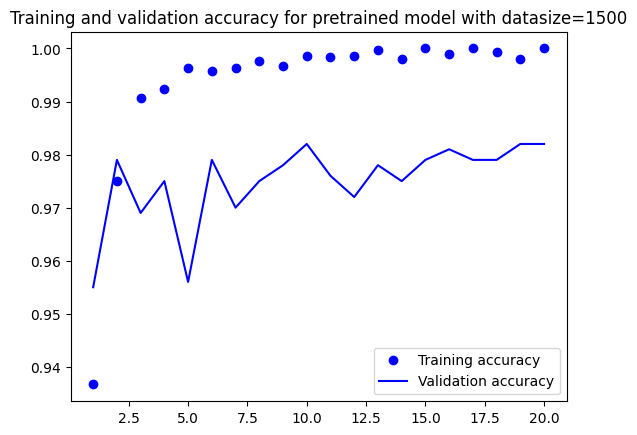

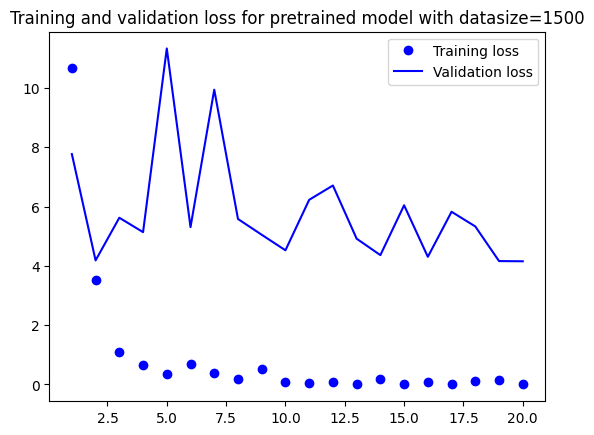

In [69]:
# import pyplot library
import matplotlib.pyplot as plt

acc = history22.history["accuracy"]
val_acc = history22.history["val_accuracy"]
loss = history22.history["loss"]
val_loss = history22.history["val_loss"]
epochs = range(1, len(acc) + 1)

# plot Training and validation accuracy
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy for pretrained model with datasize=1500")
plt.legend()
plt.figure()

# plot Training and validation accuracy
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss for pretrained model with datasize=1500")
plt.legend()
plt.show()

Evaluate the pretrained model with datasize 1500

In [70]:
# evaluate the model
test_accuracy22 = keras.models.load_model("feature_extraction22.keras",safe_mode=False)
test_loss, test_acc = test_accuracy22.evaluate(test_features2, test_labels2)
print(f"Test accuracy22: {test_acc:.3f}")

32/32 [==============================] - 0s 3ms/step - loss: 6.5748 - accuracy: 0.9720
Test accuracy22: 0.972


instantiating and freezing the VGG16 convolutional base

In [72]:
#instantiating and freezing the VGG16 convolutional bas
convolution_base1  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
convolution_base.trainable = False

# Printing the list of trainable weights before and after freezing
convolution_base1.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(convolution_base1.trainable_weights))

convolution_base1.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(convolution_base1.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


Adding a data augmentation stage and a classifier to the convolutional base

In [74]:
# adding data augmentation layers
data_augmentation22 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# adding data augmentation layers to the classifier
input22 = keras.Input(shape=(180, 180, 3))
x22= data_augmentation22(input22)
x22 =keras.layers.Lambda(
     lambda x2: keras.applications.vgg16.preprocess_input(x2))(x22)
x22 = convolution_base(x22)
x22 = layers.Flatten()(x22)
x22 = layers.Dense(256)(x22)
x22 = layers.Dropout(0.25)(x22)

# output layer
outputs22 = layers.Dense(1, activation="sigmoid")(x22)
model22 = keras.Model(input22, outputs22)

# compile the model
model22.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Fitting the dataset to pretreined model and classifer

In [75]:
callbacks22_aug = [
    keras.callbacks.ModelCheckpoint(
        filepath="features_extraction_with_augmentation22.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

# fit the model
history22_aug = model22.fit(
    train_data2,
    epochs=20,
    validation_data=validation_data2,
    callbacks=callbacks22_aug
)

Epoch 1/20
94/94 [==============================] - 15s 126ms/step - loss: 7.4265 - accuracy: 0.9187 - val_loss: 1.3607 - val_accuracy: 0.9810
Epoch 2/20
94/94 [==============================] - 12s 120ms/step - loss: 2.4461 - accuracy: 0.9640 - val_loss: 2.4614 - val_accuracy: 0.9700
Epoch 3/20
94/94 [==============================] - 12s 123ms/step - loss: 1.9269 - accuracy: 0.9690 - val_loss: 1.7401 - val_accuracy: 0.9770
Epoch 4/20
94/94 [==============================] - 12s 123ms/step - loss: 1.6023 - accuracy: 0.9673 - val_loss: 2.2380 - val_accuracy: 0.9690
Epoch 5/20
94/94 [==============================] - 12s 121ms/step - loss: 0.9102 - accuracy: 0.9787 - val_loss: 1.5018 - val_accuracy: 0.9750
Epoch 6/20
94/94 [==============================] - 13s 132ms/step - loss: 0.6282 - accuracy: 0.9790 - val_loss: 0.9146 - val_accuracy: 0.9800
Epoch 7/20
94/94 [==============================] - 14s 146ms/step - loss: 0.6578 - accuracy: 0.9820 - val_loss: 0.9251 - val_accuracy: 0.9800

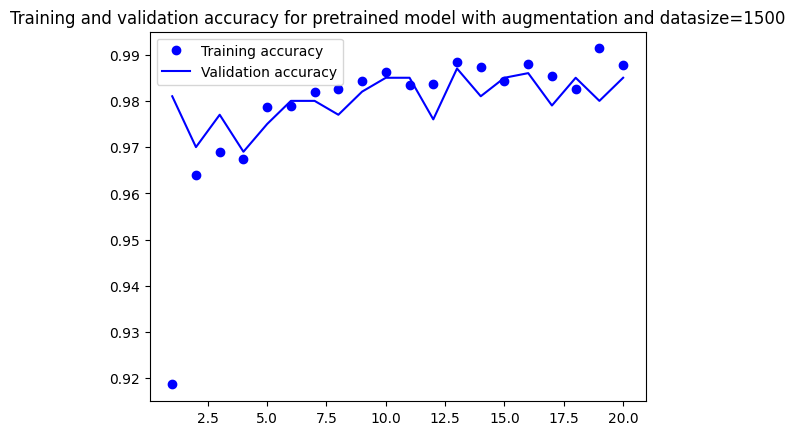

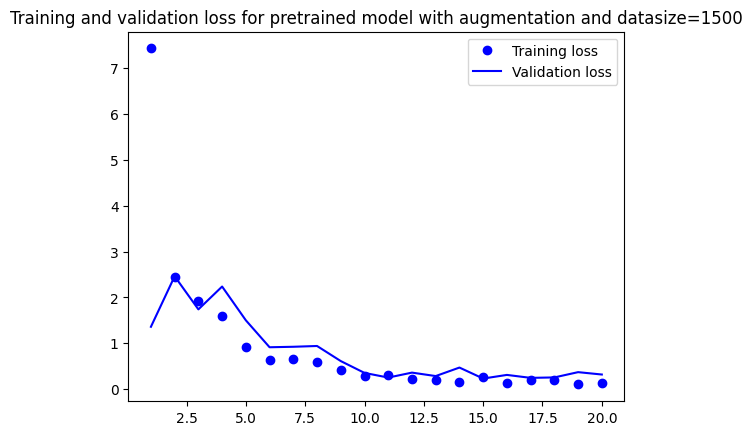

In [104]:
# import pyplot library
import matplotlib.pyplot as plt

acc = history22_aug.history["accuracy"]
val_acc = history22_aug.history["val_accuracy"]
loss = history22_aug.history["loss"]
val_loss = history22_aug.history["val_loss"]
epochs = range(1, len(acc) + 1)

# plot Training and validation accuracy
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy for pretrained model with augmentation and datasize=1500")
plt.legend()
plt.figure()

# plot Training and validation accuracy
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss for pretrained model with augmentation and datasize=1500")
plt.legend()
plt.show()

Evaluating the model on the test set

In [76]:
# Evaluating the model on the test set
test_accuracy22_aug = keras.models.load_model(
    "features_extraction_with_augmentation22.keras",safe_mode=False)
test_loss, test_acc = test_accuracy22_aug.evaluate(test_data2)
print(f"Test accuracy22_aug: {test_acc:.3f}")

32/32 [==============================] - 3s 91ms/step - loss: 0.6193 - accuracy: 0.9720
Test accuracy22_aug: 0.972


Fine-tuning a pretrained model

In [77]:
# Freezing all layers until the fourth from the last
convolution_base1.trainable = True
for layer in convolution_base1.layers[:-4]:
    layer.trainable = False

Compiling and fitting the fine tunned model

In [78]:
# compile the model
model22.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks22_tune = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning22.keras",
        save_best_only=True,
        monitor="val_loss")
]
# fit the model
history22_tune = model22.fit(
    train_data2,
    epochs=20,
    validation_data=validation_data2,
    callbacks=callbacks22_tune)

Epoch 1/20
94/94 [==============================] - 14s 139ms/step - loss: 0.1171 - accuracy: 0.9873 - val_loss: 0.2917 - val_accuracy: 0.9830
Epoch 2/20
94/94 [==============================] - 13s 138ms/step - loss: 0.1231 - accuracy: 0.9873 - val_loss: 0.2797 - val_accuracy: 0.9830
Epoch 3/20
94/94 [==============================] - 14s 140ms/step - loss: 0.1139 - accuracy: 0.9907 - val_loss: 0.2712 - val_accuracy: 0.9830
Epoch 4/20
94/94 [==============================] - 14s 144ms/step - loss: 0.1060 - accuracy: 0.9890 - val_loss: 0.2662 - val_accuracy: 0.9830
Epoch 5/20
94/94 [==============================] - 14s 152ms/step - loss: 0.0904 - accuracy: 0.9910 - val_loss: 0.2614 - val_accuracy: 0.9830
Epoch 6/20
94/94 [==============================] - 14s 142ms/step - loss: 0.1014 - accuracy: 0.9883 - val_loss: 0.2595 - val_accuracy: 0.9830
Epoch 7/20
94/94 [==============================] - 15s 156ms/step - loss: 0.0506 - accuracy: 0.9920 - val_loss: 0.2585 - val_accuracy: 0.9830

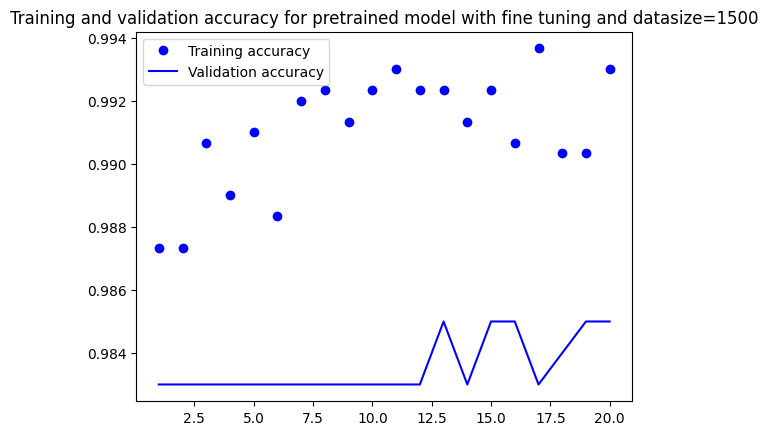

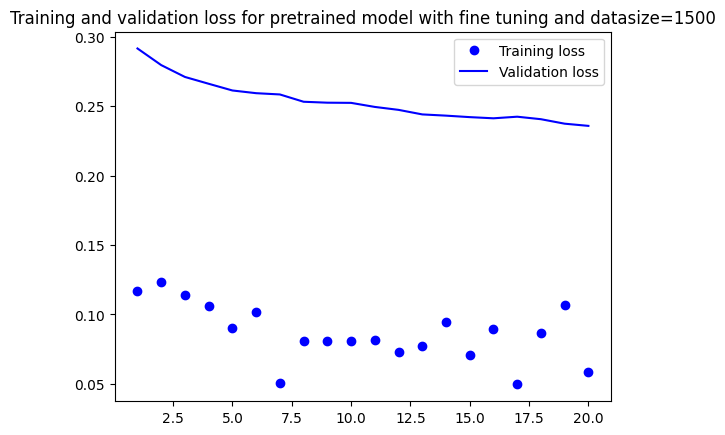

In [105]:
# import pyplot library
import matplotlib.pyplot as plt

acc = history22_tune.history["accuracy"]
val_acc = history22_tune.history["val_accuracy"]
loss = history22_tune.history["loss"]
val_loss = history22_tune.history["val_loss"]
epochs = range(1, len(acc) + 1)

# plot Training and validation accuracy
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy for pretrained model with fine tuning and datasize=1500")
plt.legend()
plt.figure()

# plot Training and validation accuracy
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss for pretrained model with fine tuning and datasize=1500")
plt.legend()
plt.show()

Evaluate the model with the test dataset

In [79]:
# Evaluate the model with the test dataset
test_accuracy22_tune = keras.models.load_model("fine_tuning22.keras",safe_mode=False)
test_loss, test_acc = test_accuracy22_tune.evaluate(test_data2)
print(f"Test accuracy22_tune: {test_acc:.3f}")

32/32 [==============================] - 3s 91ms/step - loss: 0.6640 - accuracy: 0.9760
Test accuracy22_tune: 0.976


Instantiating the VGG16 convolutional base for third dataset

In [80]:
#instantiating the VGG16 convolutional base
convolution_base3 = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False,
 input_shape=(180, 180, 3))

Extracting the VGG16 features and corresponding labels

In [81]:
#Extracting the VGG16 features and corresponding labels
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = convolution_base3.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

# assign the faetures and labels
train_features3, train_labels3 =  get_features_and_labels(train_data3)
val_features3, val_labels3 =  get_features_and_labels(validation_data3)
test_features3, test_labels3 =  get_features_and_labels(test_data3)

# shape of data
train_features3.shape

1/1 [==============================] - 0s 33ms/step


(4000, 5, 5, 512)

Defining and training the densely connected classifier

In [82]:
# input layer
inputs33 = keras.Input(shape=(5, 5, 512))


# flatten the input layer
x3 = layers.Flatten()(inputs33)
x3 = layers.Dense(256)(x3)
x3 = layers.Dropout(0.25)(x3)

# dropout layer to reduce overfitting
outputs33 = layers.Dense(1, activation="sigmoid")(x3)
model33= keras.Model(inputs33, outputs33)

# compile the model
model33.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callback33 = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction33.keras",
      save_best_only=True,
      monitor="val_loss")
]

# fit the model
history33 = model33.fit(
    train_features3, train_labels3,
    epochs=20,
    validation_data=(val_features3, val_labels3),
    callbacks=callback33)

Epoch 1/20
125/125 [==============================] - 1s 7ms/step - loss: 14.4819 - accuracy: 0.9417 - val_loss: 6.3986 - val_accuracy: 0.9670
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 2.3069 - accuracy: 0.9827 - val_loss: 6.5715 - val_accuracy: 0.9700
Epoch 3/20
125/125 [==============================] - 1s 7ms/step - loss: 1.0777 - accuracy: 0.9915 - val_loss: 5.5290 - val_accuracy: 0.9660
Epoch 4/20
125/125 [==============================] - 1s 6ms/step - loss: 1.5426 - accuracy: 0.9900 - val_loss: 7.3982 - val_accuracy: 0.9660
Epoch 5/20
125/125 [==============================] - 1s 6ms/step - loss: 0.5775 - accuracy: 0.9952 - val_loss: 8.2663 - val_accuracy: 0.9670
Epoch 6/20
125/125 [==============================] - 1s 6ms/step - loss: 0.5162 - accuracy: 0.9952 - val_loss: 7.6824 - val_accuracy: 0.9710
Epoch 7/20
125/125 [==============================] - 1s 6ms/step - loss: 0.2746 - accuracy: 0.9967 - val_loss: 7.1446 - val_accuracy: 0.9740
Epoch

Training and validation accuracy, loss plots for pretrained model with datasize=2000

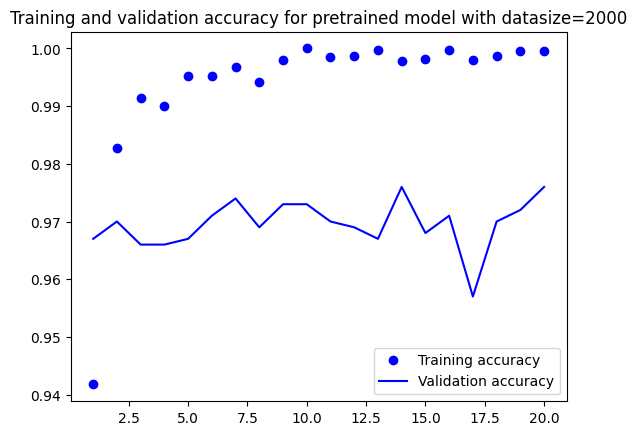

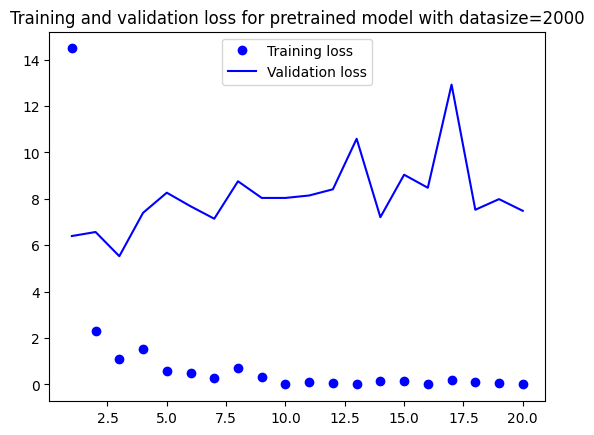

In [83]:
# import pyplot library
import matplotlib.pyplot as plt

acc = history33.history["accuracy"]
val_acc = history33.history["val_accuracy"]
loss = history33.history["loss"]
val_loss = history33.history["val_loss"]
epochs = range(1, len(acc) + 1)

# plot Training and validation accuracy
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy for pretrained model with datasize=2000")
plt.legend()
plt.figure()

# plot Training and validation loss
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss for pretrained model with datasize=2000")
plt.legend()
plt.show()

Evaluate the pretrained model with datasize 2000

In [84]:
# Evaluate the pretrained model with datasize 2000
test_accuracy33 = keras.models.load_model("feature_extraction33.keras",safe_mode=False)
test_loss, test_acc = test_accuracy33.evaluate(test_features3, test_labels3)
print(f"Test accuracy33: {test_acc:.3f}")

32/32 [==============================] - 0s 4ms/step - loss: 5.4757 - accuracy: 0.9710
Test accuracy33: 0.971


Instantiating and freezing the VGG16 convolutional base

In [85]:
# instantiating and freezing the VGG16 convolutional base
convolution_base3  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
convolution_base3.trainable = False


# Printing the list of trainable weights before and after freezing
convolution_base3.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(convolution_base3.trainable_weights))

convolution_base3.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(convolution_base3.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


Adding a data augmentation stage and a classifier to the convolutional base

In [87]:
# adding data augmentation layers
data_augmentation33 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# adding data augmentation layers to the classifier
input33 = keras.Input(shape=(180, 180, 3))
x33= data_augmentation33(input33)
x33 =keras.layers.Lambda(
     lambda x3: keras.applications.vgg16.preprocess_input(x3))(x33)
x33 = convolution_base(x33)
x33 = layers.Flatten()(x33)
x33 = layers.Dense(256)(x33)
x33 = layers.Dropout(0.25)(x33)

# output layer
outputs33 = layers.Dense(1, activation="sigmoid")(x33)
model33 = keras.Model(input33, outputs33)

# adding data augmentation layers
model33.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Fitting the dataset to pretreined model and classifer

In [88]:
callbacks33_aug = [
    keras.callbacks.ModelCheckpoint(
        filepath="features_extraction_with_augmentation33.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

# fit the model
history33_aug = model33.fit(
    train_data3,
    epochs=20,
    validation_data=validation_data3,
    callbacks=callbacks33_aug
)

Epoch 1/20
125/125 [==============================] - 19s 135ms/step - loss: 6.9640 - accuracy: 0.9330 - val_loss: 2.1069 - val_accuracy: 0.9820
Epoch 2/20
125/125 [==============================] - 17s 129ms/step - loss: 2.3539 - accuracy: 0.9678 - val_loss: 2.2107 - val_accuracy: 0.9750
Epoch 3/20
125/125 [==============================] - 17s 133ms/step - loss: 1.8996 - accuracy: 0.9678 - val_loss: 1.8552 - val_accuracy: 0.9780
Epoch 4/20
125/125 [==============================] - 15s 120ms/step - loss: 1.1740 - accuracy: 0.9722 - val_loss: 1.5348 - val_accuracy: 0.9790
Epoch 5/20
125/125 [==============================] - 15s 120ms/step - loss: 0.8467 - accuracy: 0.9753 - val_loss: 1.0796 - val_accuracy: 0.9760
Epoch 6/20
125/125 [==============================] - 17s 136ms/step - loss: 0.5313 - accuracy: 0.9758 - val_loss: 0.7759 - val_accuracy: 0.9740
Epoch 7/20
125/125 [==============================] - 15s 119ms/step - loss: 0.3760 - accuracy: 0.9795 - val_loss: 0.8318 - val_ac

Evaluating the model on the test set

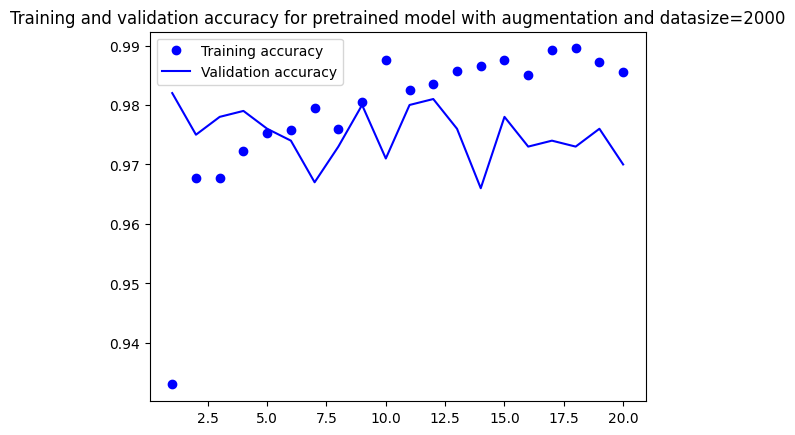

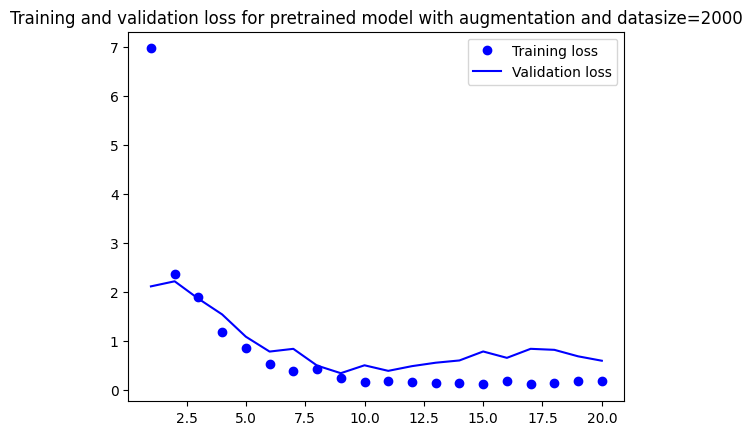

In [106]:
# import pyplot library
import matplotlib.pyplot as plt

acc = history33_aug.history["accuracy"]
val_acc = history33_aug.history["val_accuracy"]
loss = history33_aug.history["loss"]
val_loss = history33_aug.history["val_loss"]
epochs = range(1, len(acc) + 1)

# plot Training and validation accuracy
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy for pretrained model with augmentation and datasize=2000")
plt.legend()
plt.figure()

# plot Training and validation loss
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss for pretrained model with augmentation and datasize=2000")
plt.legend()
plt.show()

In [90]:
#Evaluating the model on the test set
test_accuracy33_aug = keras.models.load_model(
    "features_extraction_with_augmentation33.keras",safe_mode=False)
test_loss, test_acc = test_accuracy33_aug.evaluate(test_data3)
print(f"Test accuracy33_aug: {test_acc:.3f}")

32/32 [==============================] - 4s 90ms/step - loss: 0.3742 - accuracy: 0.9730
Test accuracy33_aug: 0.973


Fine-tuning a pretrained model

In [91]:
# Freezing all layers until the fourth from the last
convolution_base3.trainable = True
for layer in convolution_base3.layers[:-4]:
    layer.trainable = False

Compiling and fitting the fine tunned model

In [92]:
# compile the model
model33.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks33_tune = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning33.keras",
        save_best_only=True,
        monitor="val_loss")
]

# fit the model
history33_tune = model33.fit(
    train_data3,
    epochs=20,
    validation_data=validation_data3,
    callbacks=callbacks33_tune)

Epoch 1/20
125/125 [==============================] - 20s 136ms/step - loss: 0.1188 - accuracy: 0.9877 - val_loss: 0.5788 - val_accuracy: 0.9700
Epoch 2/20
125/125 [==============================] - 15s 116ms/step - loss: 0.0843 - accuracy: 0.9908 - val_loss: 0.5790 - val_accuracy: 0.9700
Epoch 3/20
125/125 [==============================] - 15s 120ms/step - loss: 0.0690 - accuracy: 0.9908 - val_loss: 0.5749 - val_accuracy: 0.9710
Epoch 4/20
125/125 [==============================] - 16s 122ms/step - loss: 0.0916 - accuracy: 0.9915 - val_loss: 0.5725 - val_accuracy: 0.9720
Epoch 5/20
125/125 [==============================] - 16s 123ms/step - loss: 0.0966 - accuracy: 0.9895 - val_loss: 0.5656 - val_accuracy: 0.9720
Epoch 6/20
125/125 [==============================] - 15s 122ms/step - loss: 0.0756 - accuracy: 0.9915 - val_loss: 0.5624 - val_accuracy: 0.9720
Epoch 7/20
125/125 [==============================] - 16s 125ms/step - loss: 0.0996 - accuracy: 0.9893 - val_loss: 0.5535 - val_ac

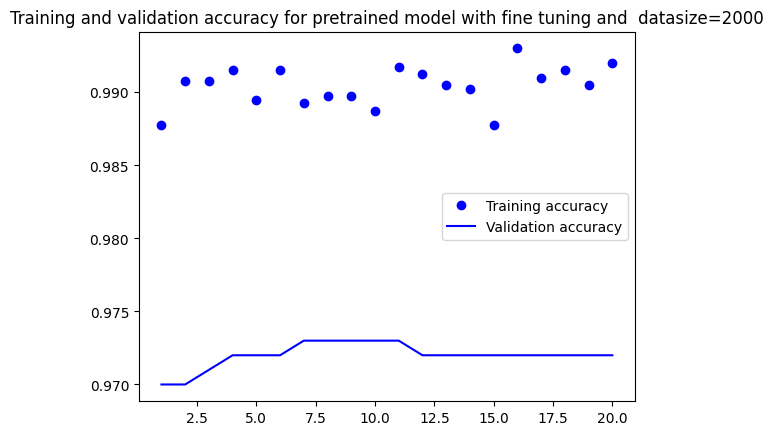

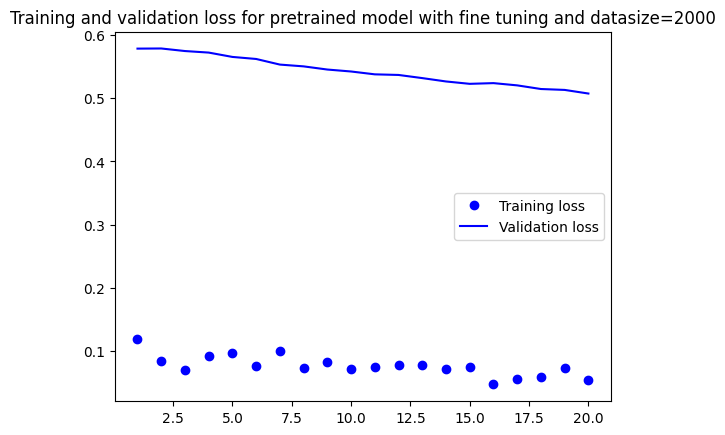

In [107]:
# import pyplot library
import matplotlib.pyplot as plt

acc = history33_tune.history["accuracy"]
val_acc = history33_tune.history["val_accuracy"]
loss = history33_tune.history["loss"]
val_loss = history33_tune.history["val_loss"]
epochs = range(1, len(acc) + 1)

# plot Training and validation accuracy
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy for pretrained model with fine tuning and  datasize=2000")
plt.legend()
plt.figure()

# plot Training and validation loss
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss for pretrained model with fine tuning and datasize=2000")
plt.legend()
plt.show()

Evaluate the model with the test dataset

In [93]:
# Evaluate the model with the test dataset
test_accuracy33_tune = keras.models.load_model("fine_tuning33.keras",safe_mode=False)
test_loss, test_acc = test_accuracy33_tune.evaluate(test_data3)
print(f"Test accuracy33_tune: {test_acc:.3f}")

32/32 [==============================] - 4s 91ms/step - loss: 0.3892 - accuracy: 0.9800
Test accuracy33_tune: 0.980
